<a href="https://colab.research.google.com/github/BrunoMaia23/Am/blob/main/MVP_PUC_RJ_Modelo_com_precis%C3%A3o_de_85_para_definir_se_uma_sele%C3%A7%C3%A3o_vai_ser_campe%C3%A3_da_Copa_do_mundo_de_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # DEFINIÇÃO DO PROBLEMA

Descrição: O problema envolve prever a probabilidade de uma seleção ser campeã da Copa do Mundo de 2026, baseado em dados históricos de edições passadas. Este é um problema de aprendizado supervisionado e classificação binária, onde a variável-alvo será "Campeão" ou "Não Campeão".

Premissas/Hipóteses: Você pode supor que as seleções com melhor ranking FIFA, maior histórico de vitórias e desempenho em competições recentes terão uma maior probabilidade de serem campeãs.

Restrições: Os dados devem ser limitados a seleções que participaram de Copas anteriores.

Atributos do Dataset:
Ano da Copa
Seleção
Gols marcados
Gols sofridos
Ranking FIFA no início da Copa
Vitórias, derrotas, empates, etc.

In [47]:
import pandas as pd

# Carregar o dataset
url = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/Fifa_world_cup_matches.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame para verificar a estrutura
df.head()

# Verificar as colunas disponíveis no dataset
df.columns


Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

Estatísticas Descritivas:
            team1    team2 possession team1 possession team2  \
count          64       64               64               64   
unique         32       32               32               34   
top     ARGENTINA  MOROCCO              51%              35%   
freq            5        4                5                5   
mean          NaN      NaN              NaN              NaN   
std           NaN      NaN              NaN              NaN   
min           NaN      NaN              NaN              NaN   
25%           NaN      NaN              NaN              NaN   
50%           NaN      NaN              NaN              NaN   
75%           NaN      NaN              NaN              NaN   
max           NaN      NaN              NaN              NaN   

       possession in contest  number of goals team1  number of goals team2  \
count                     64              64.000000              64.000000   
unique                    11                    N

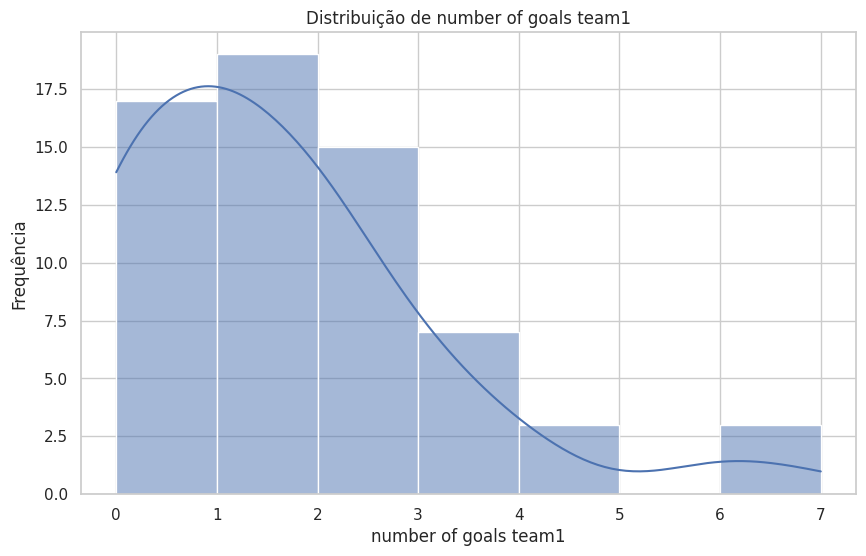

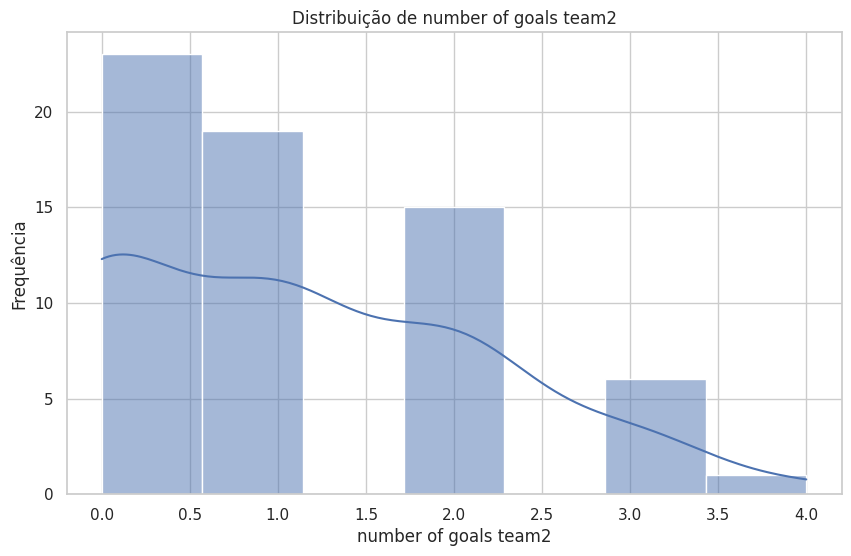

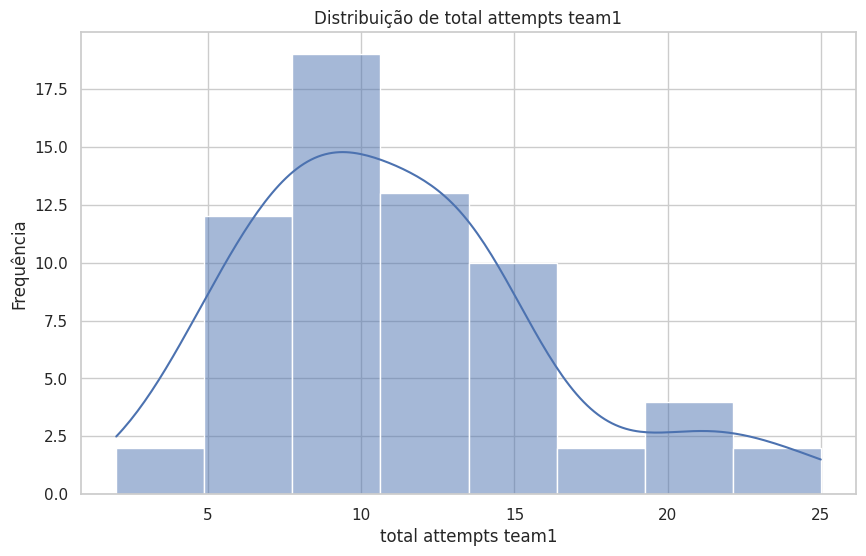

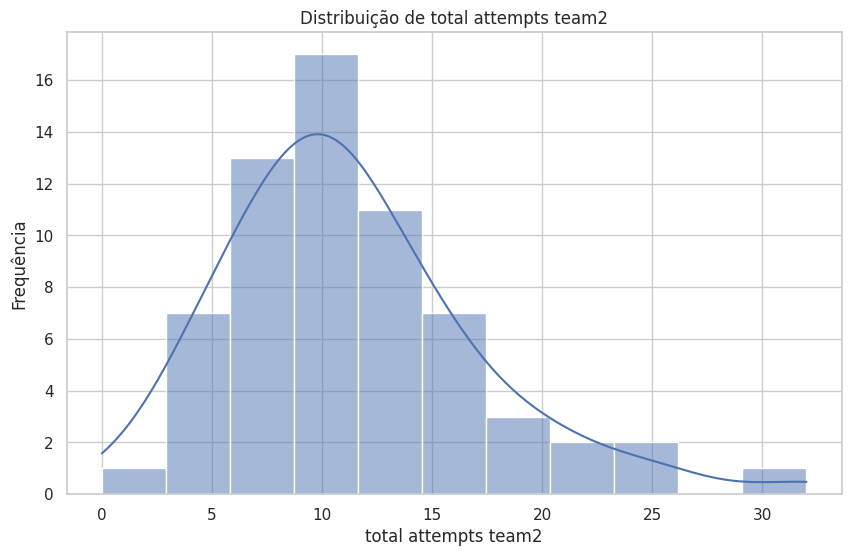

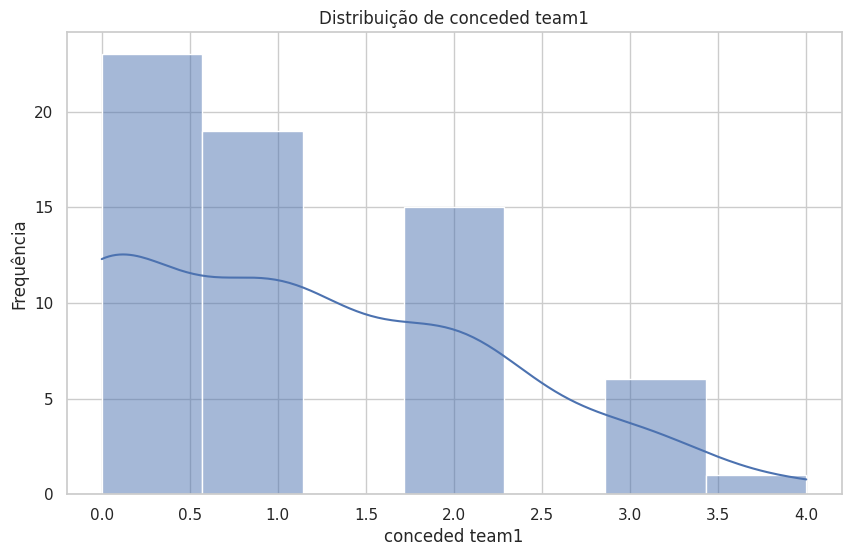

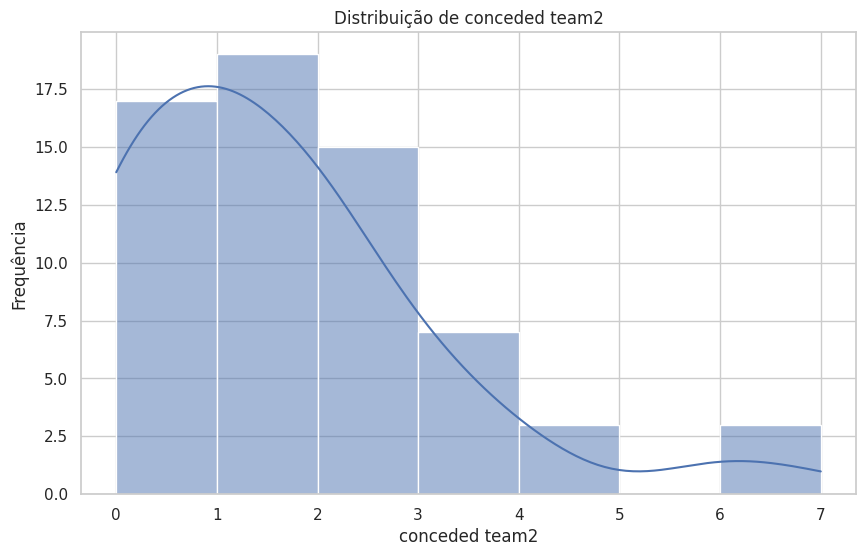

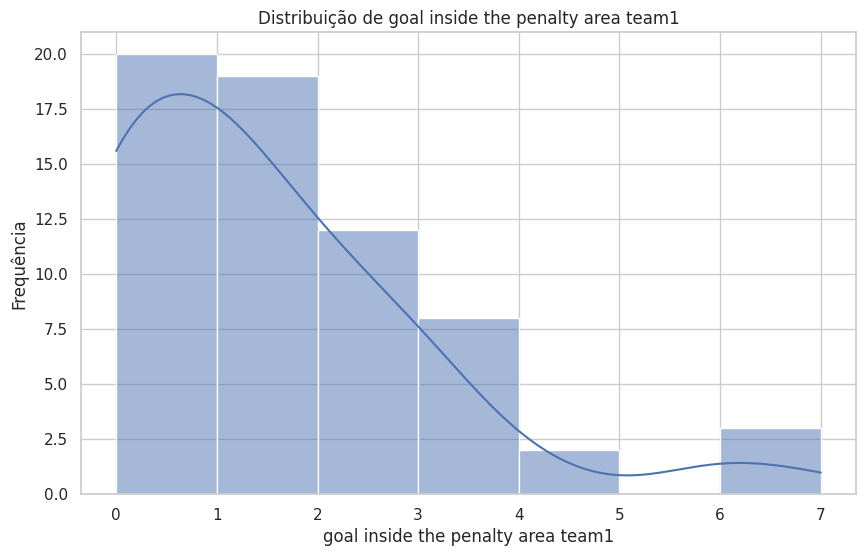

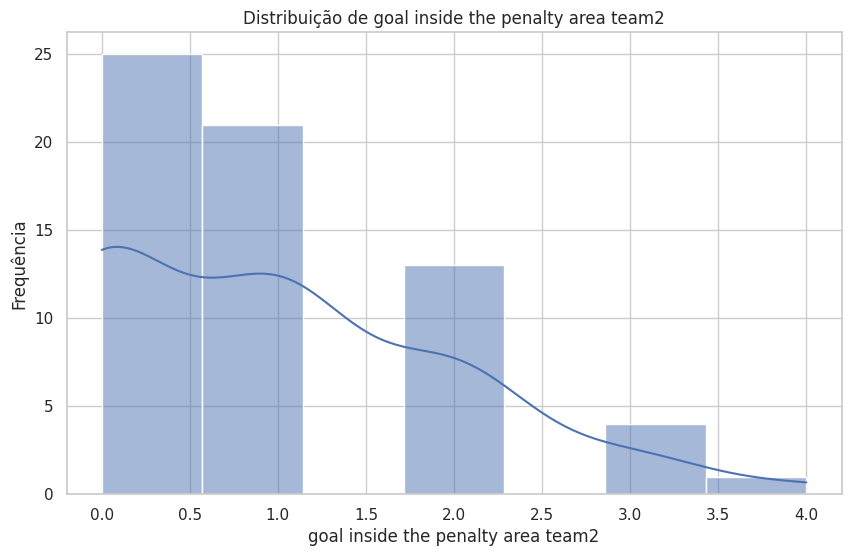

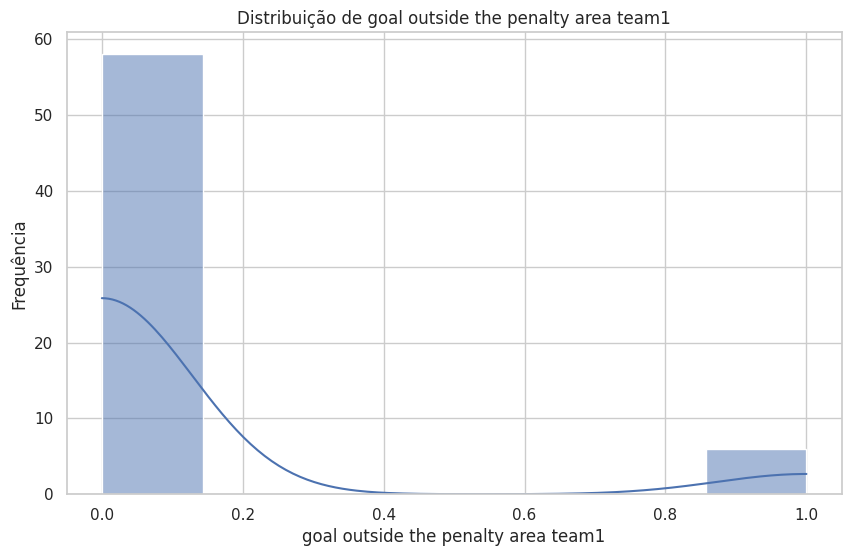

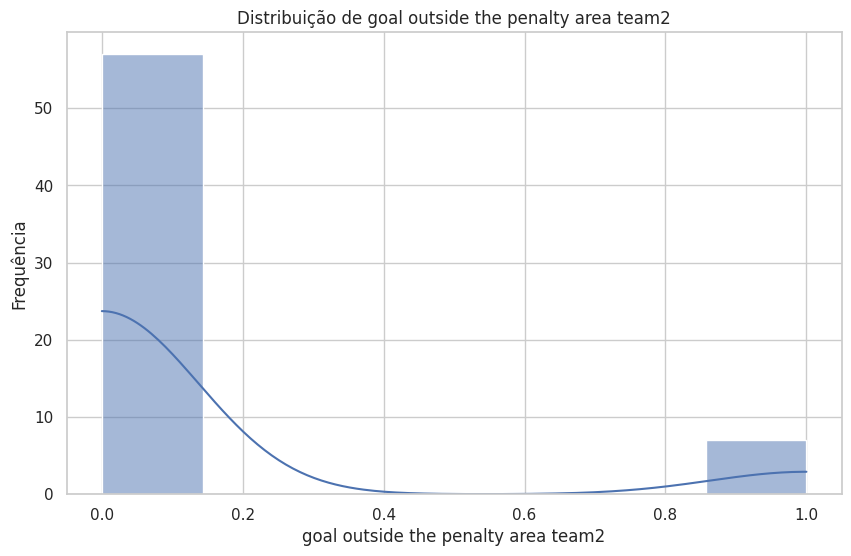

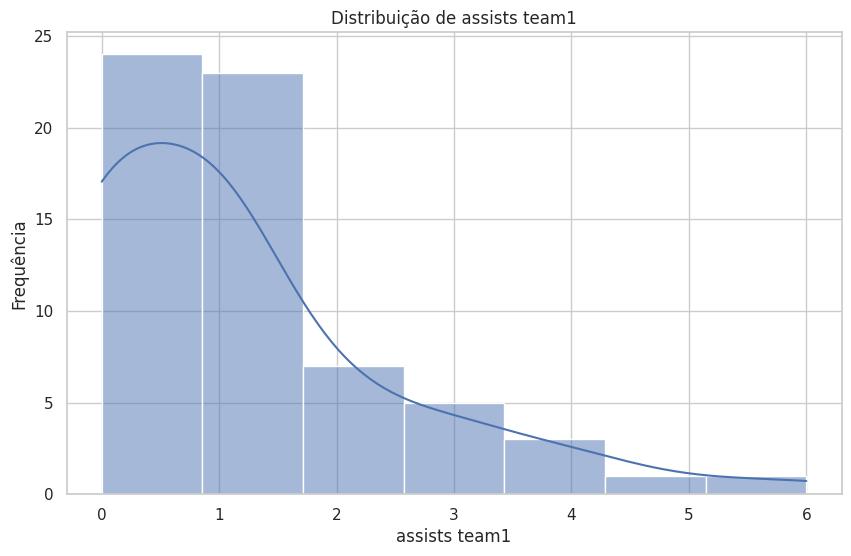

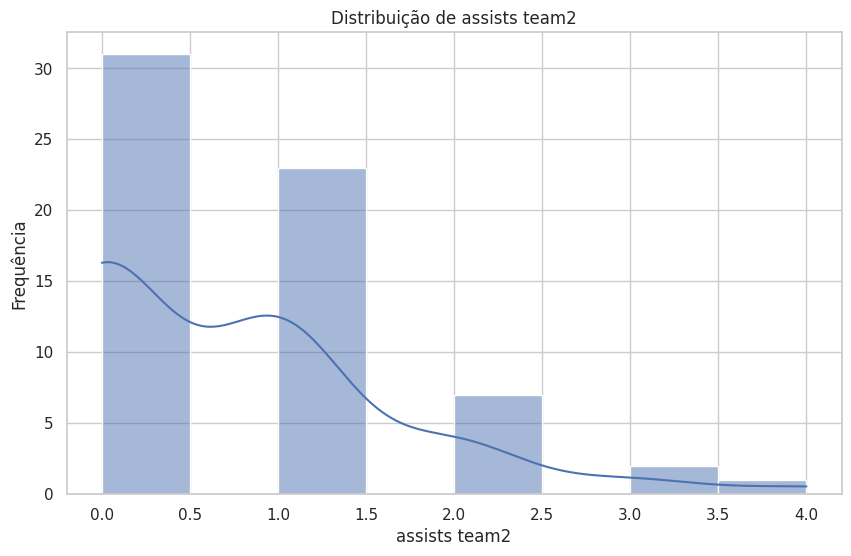

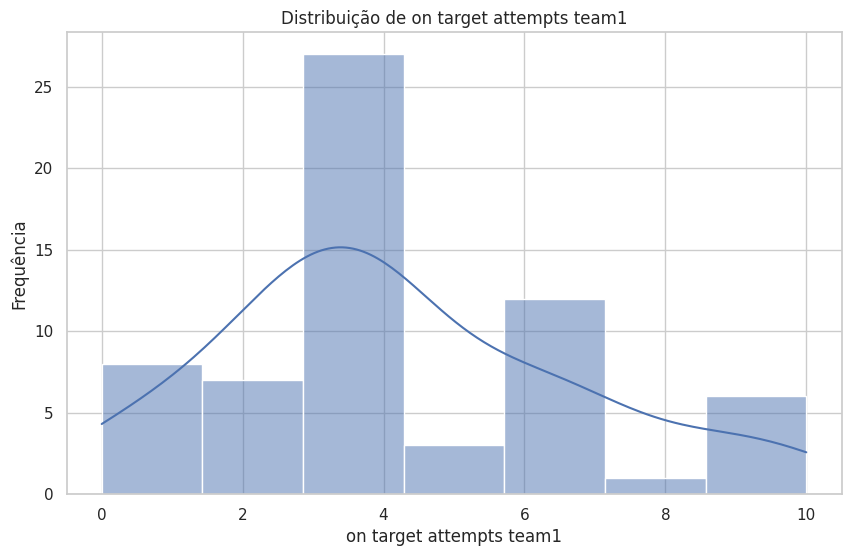

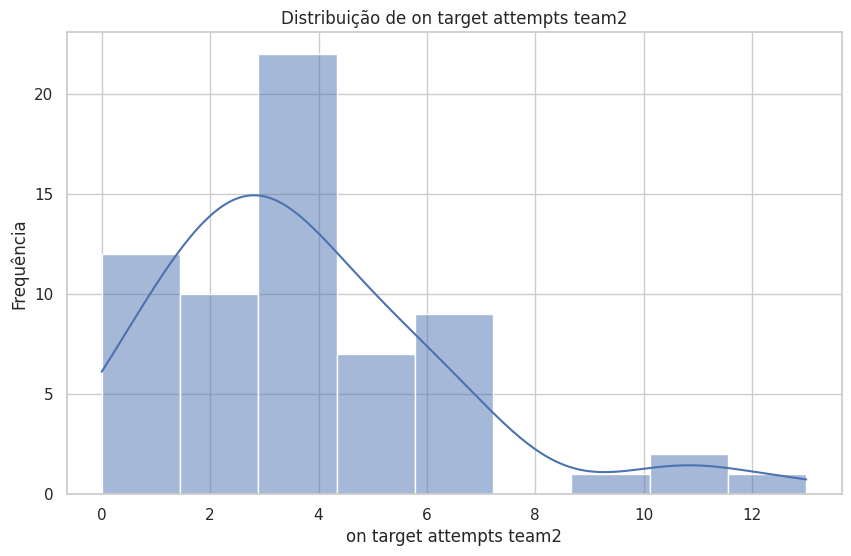

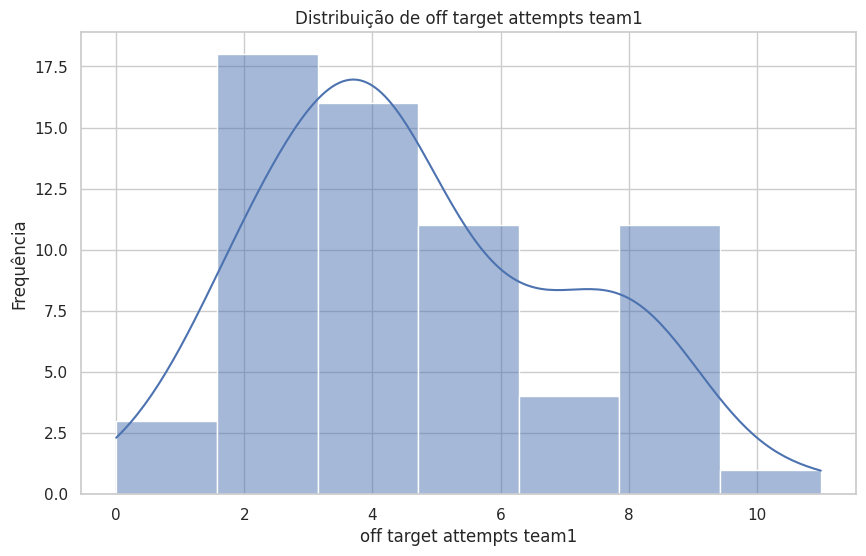

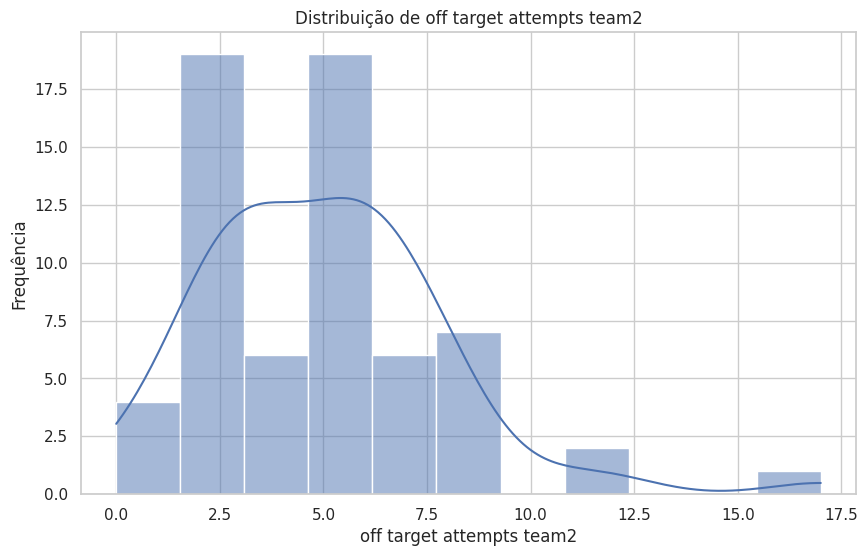

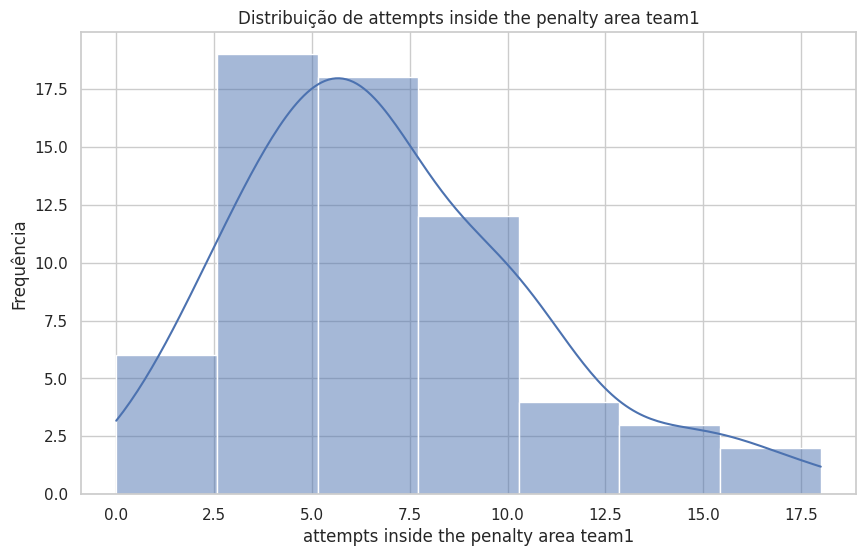

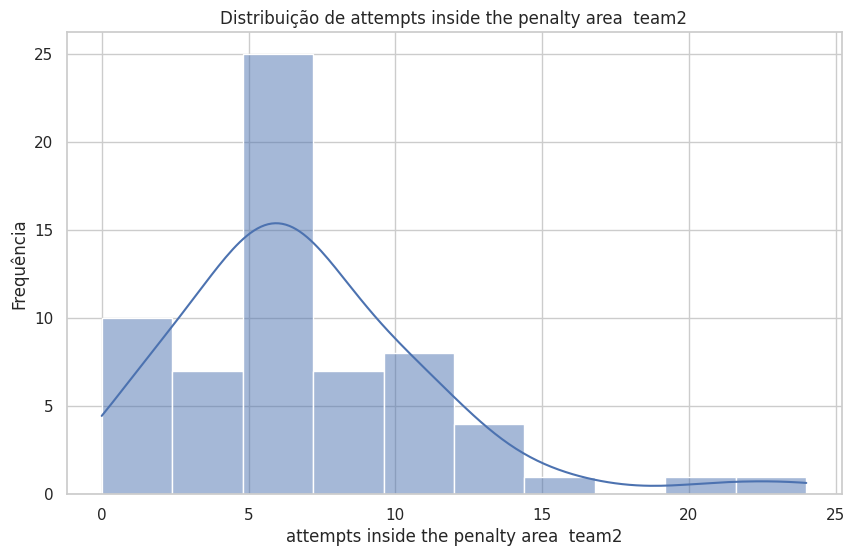

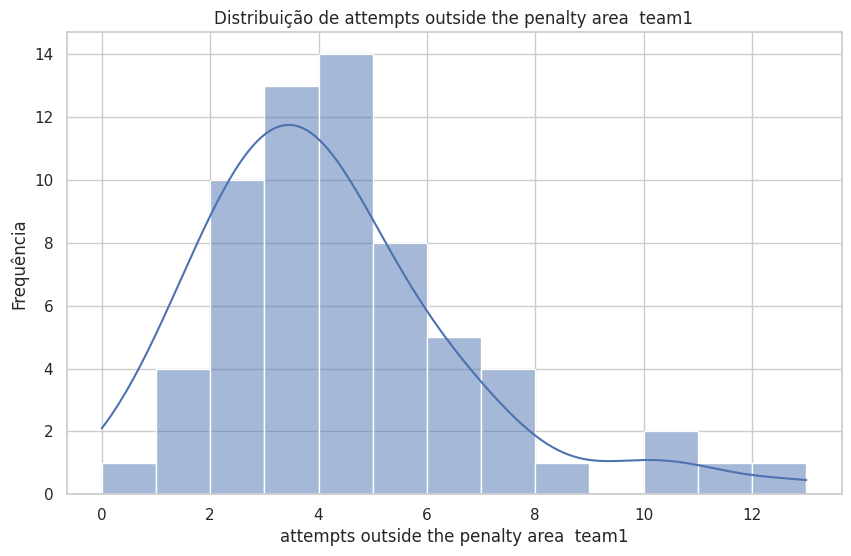

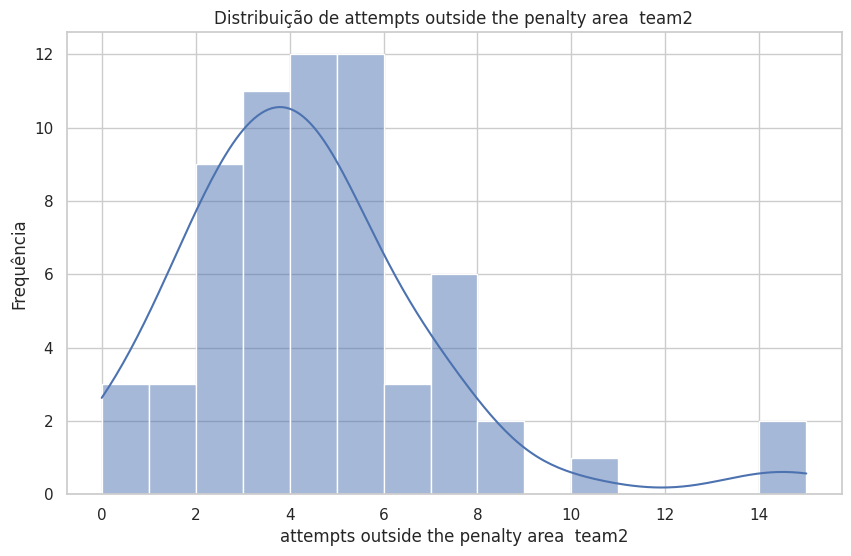

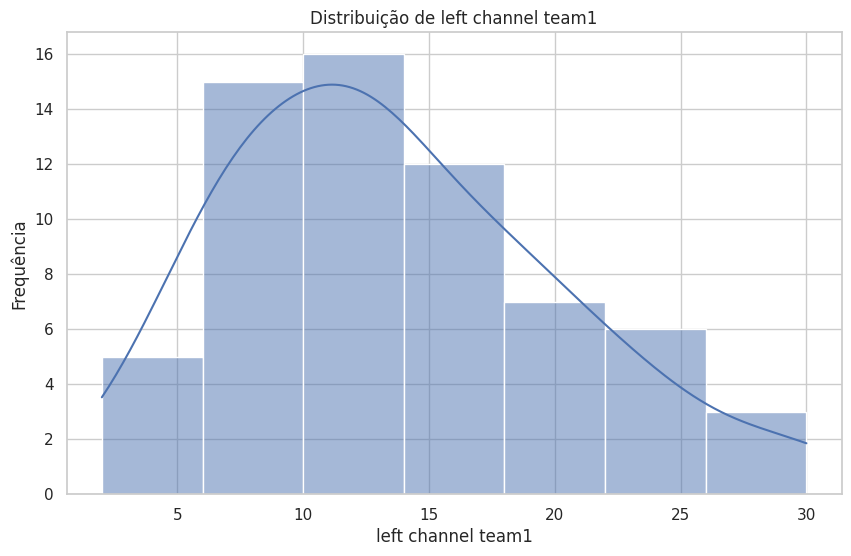

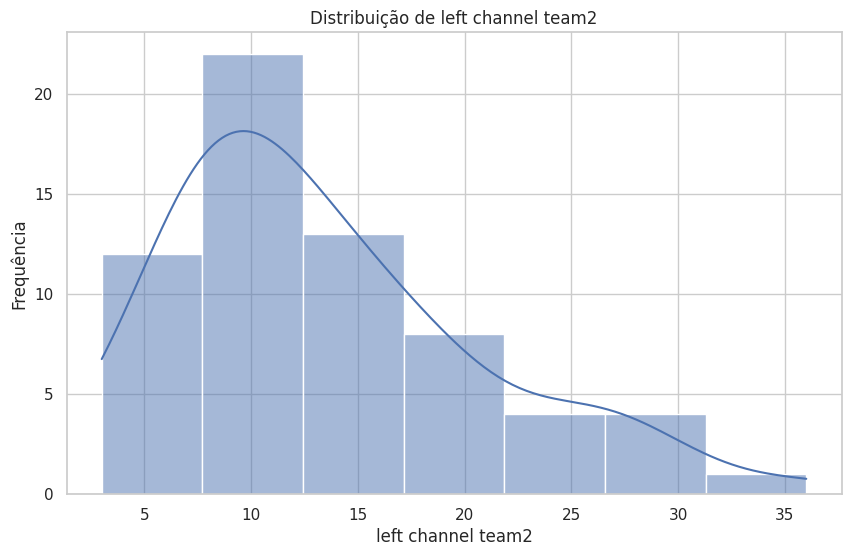

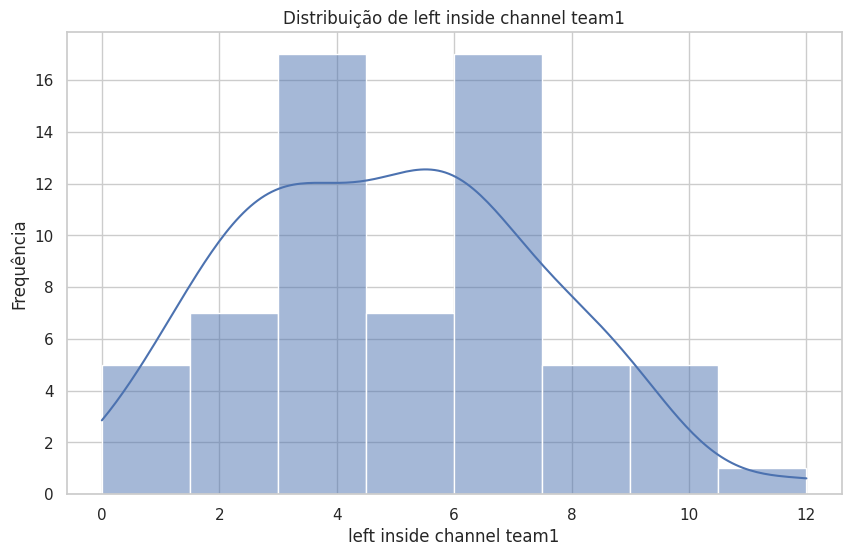

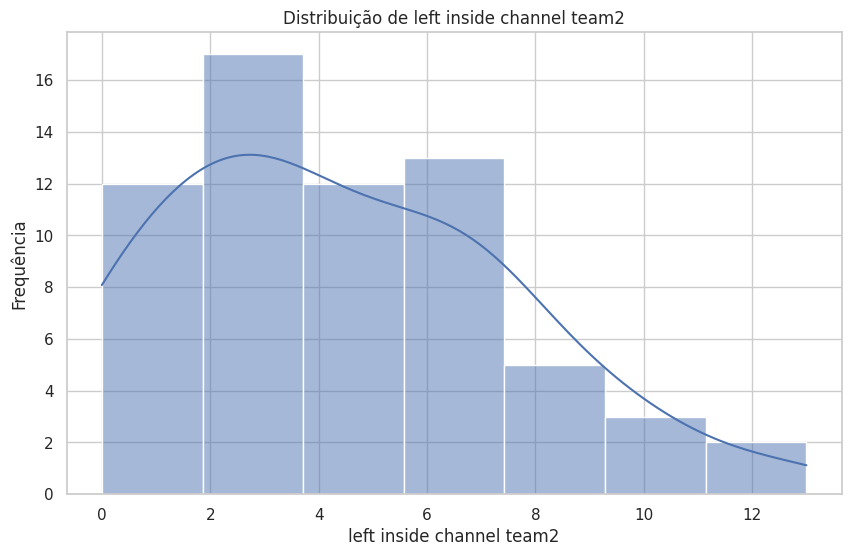

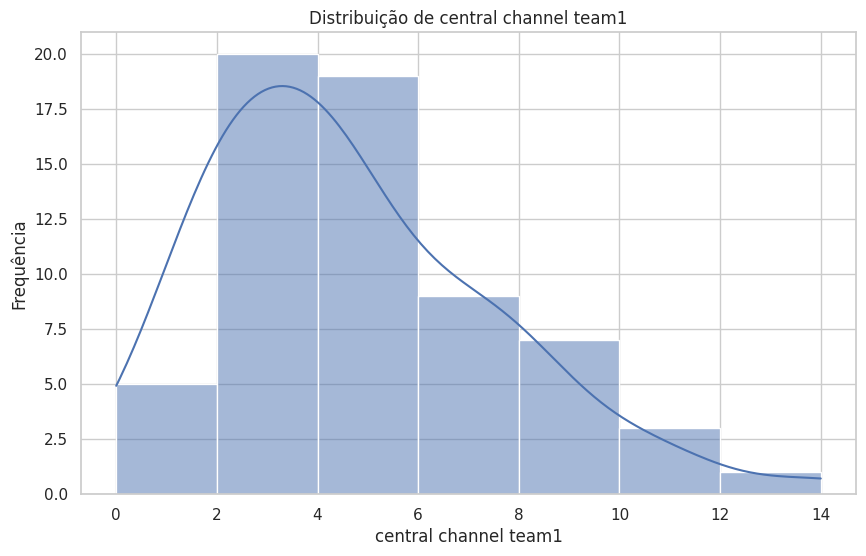

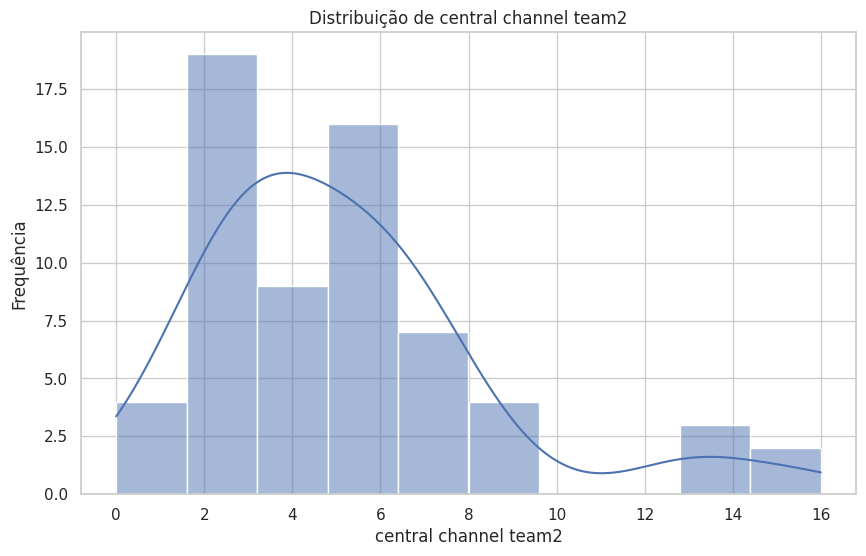

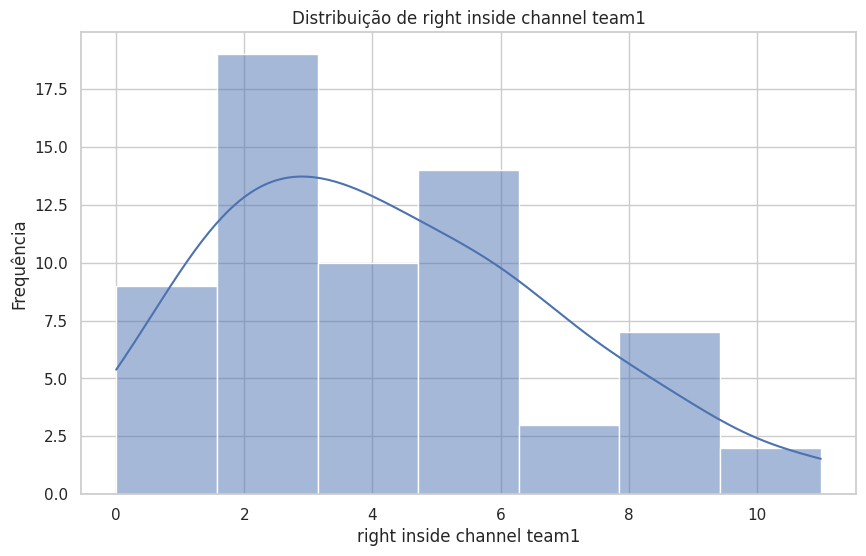

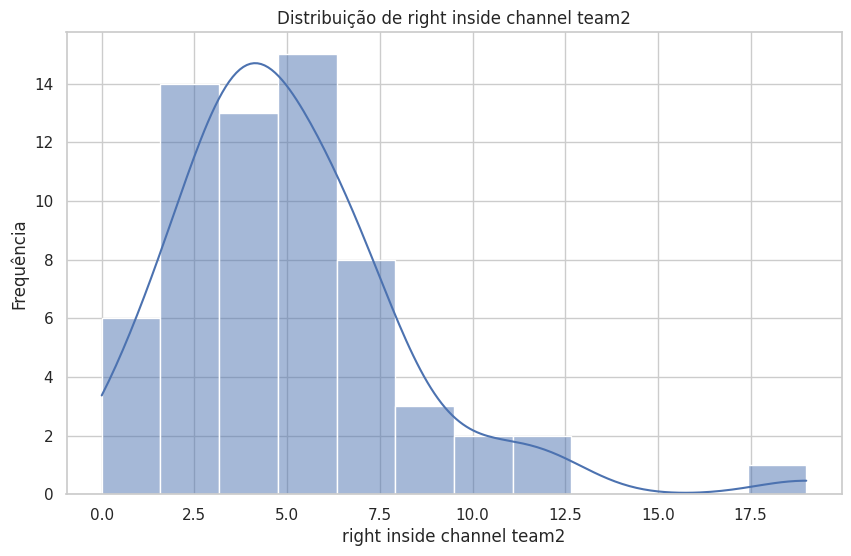

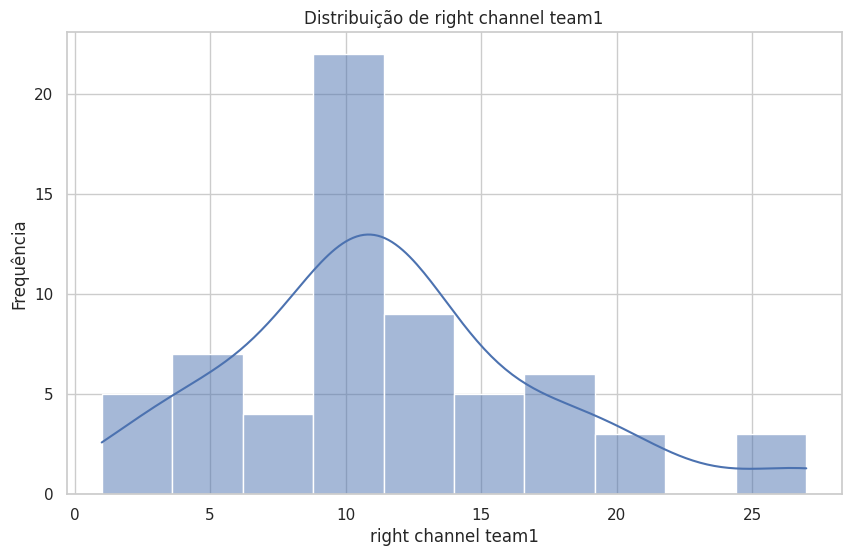

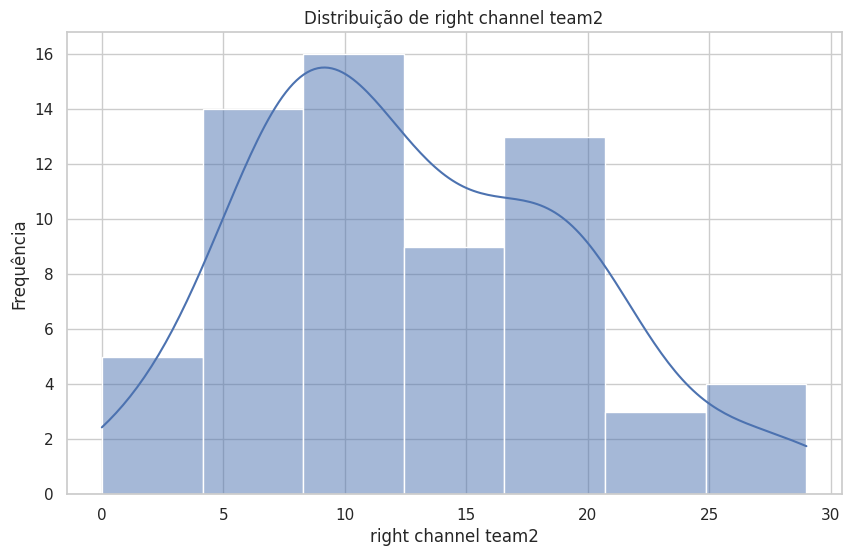

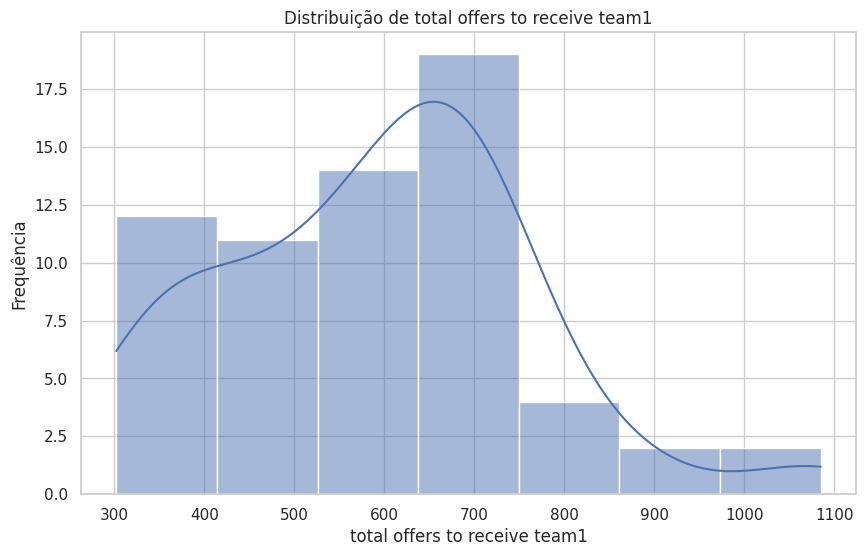

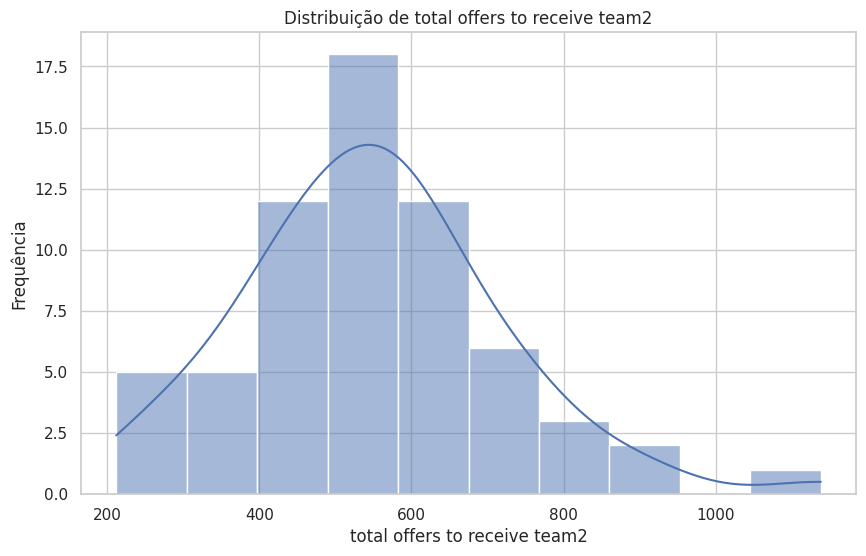

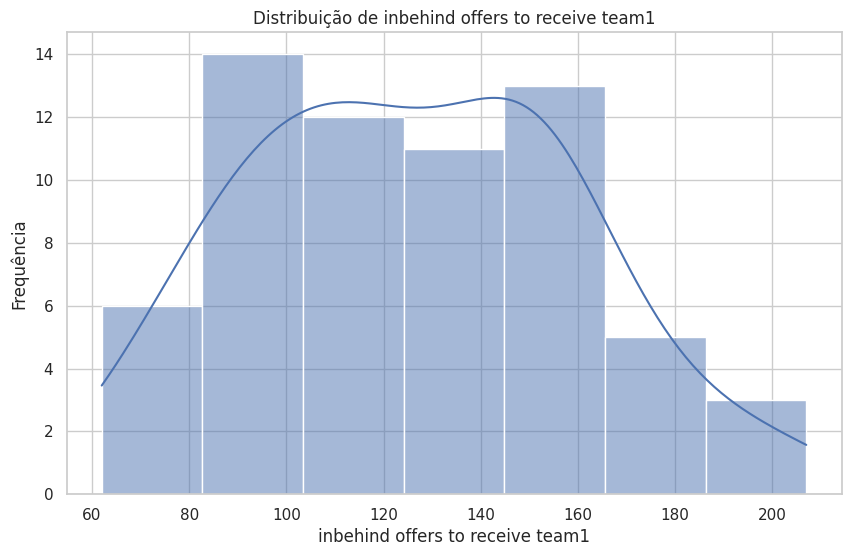

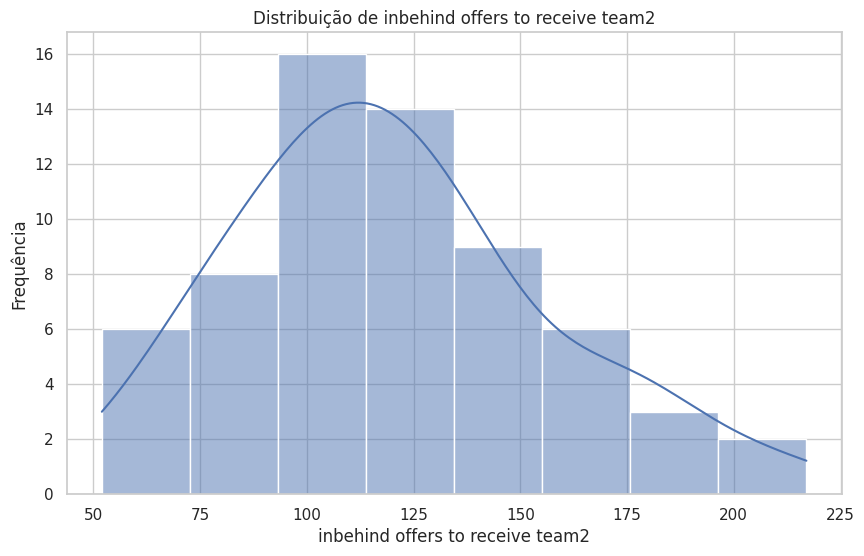

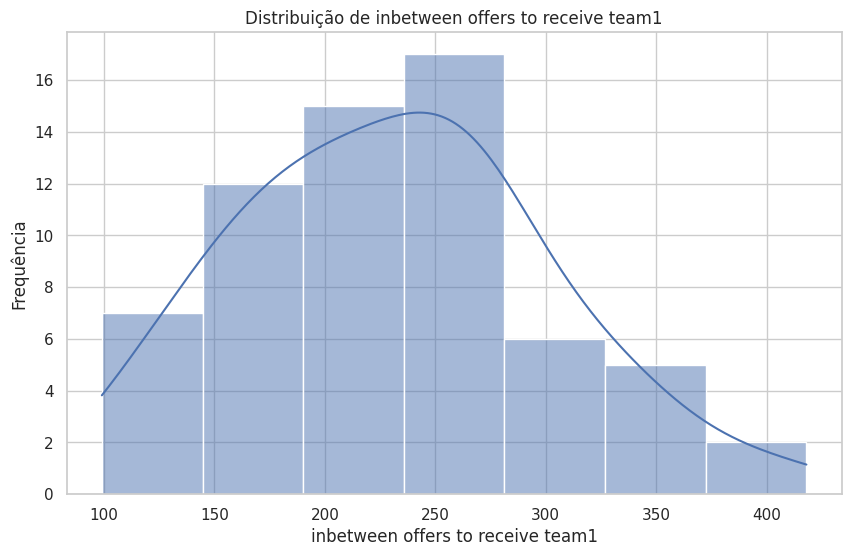

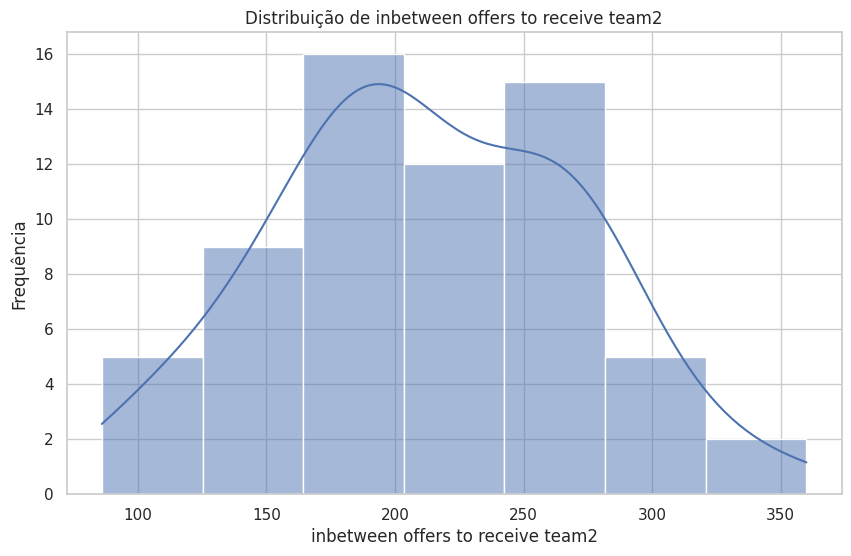

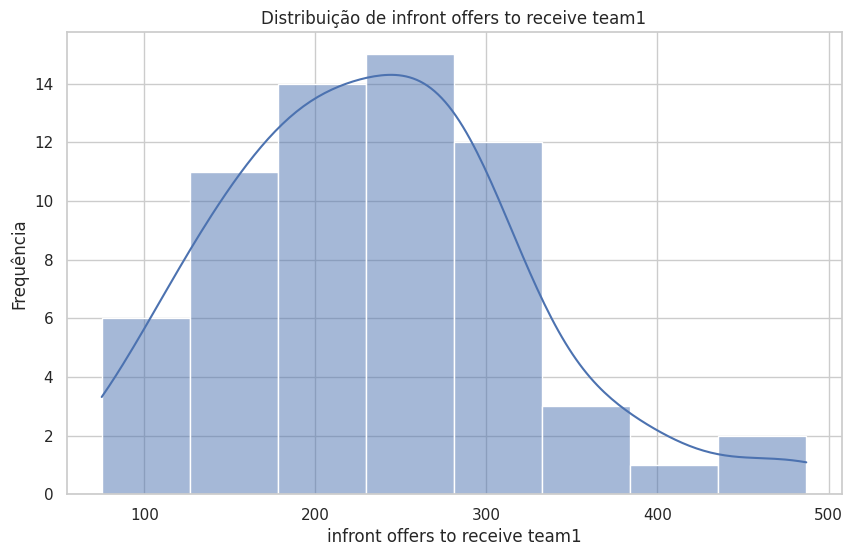

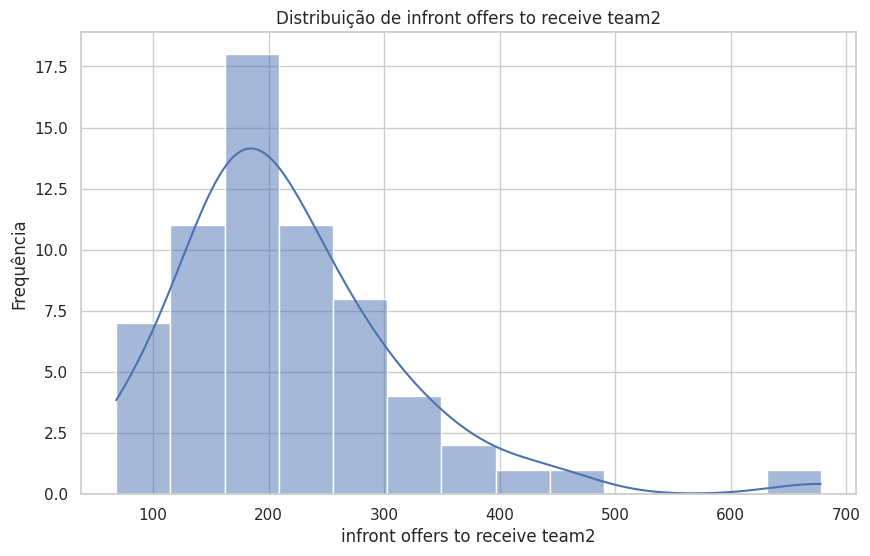

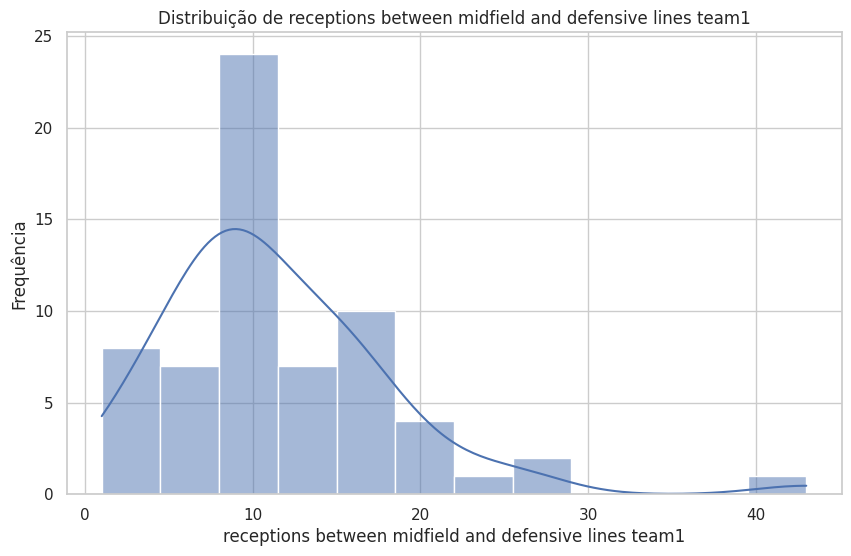

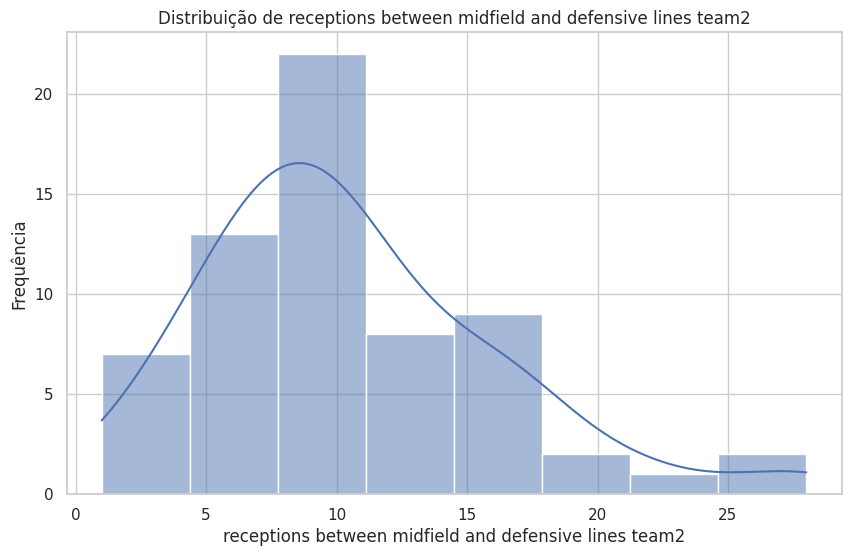

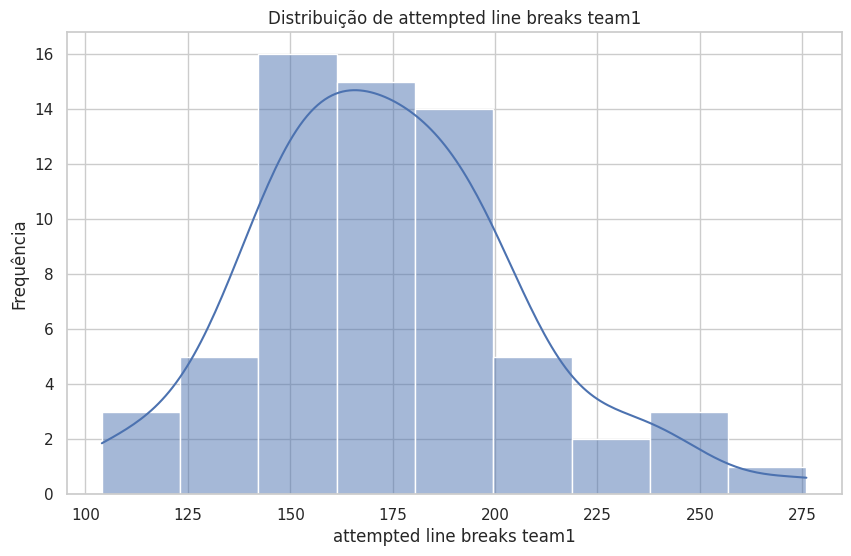

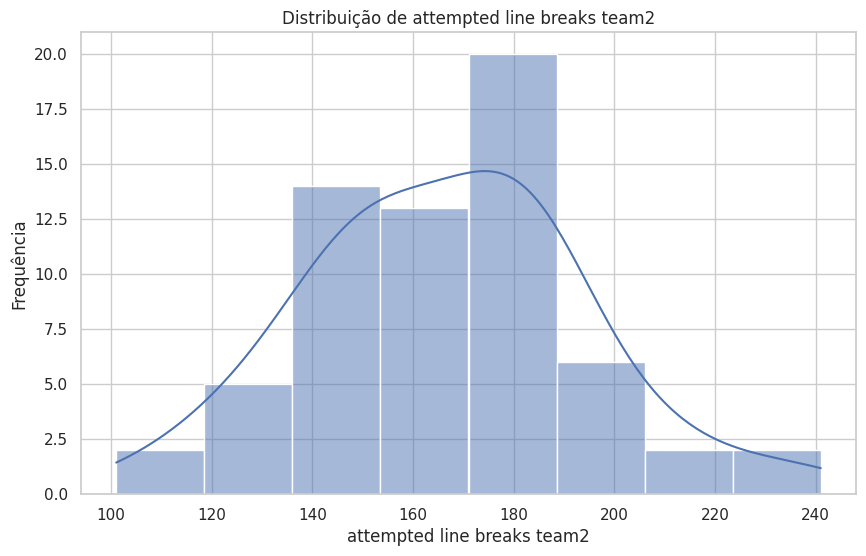

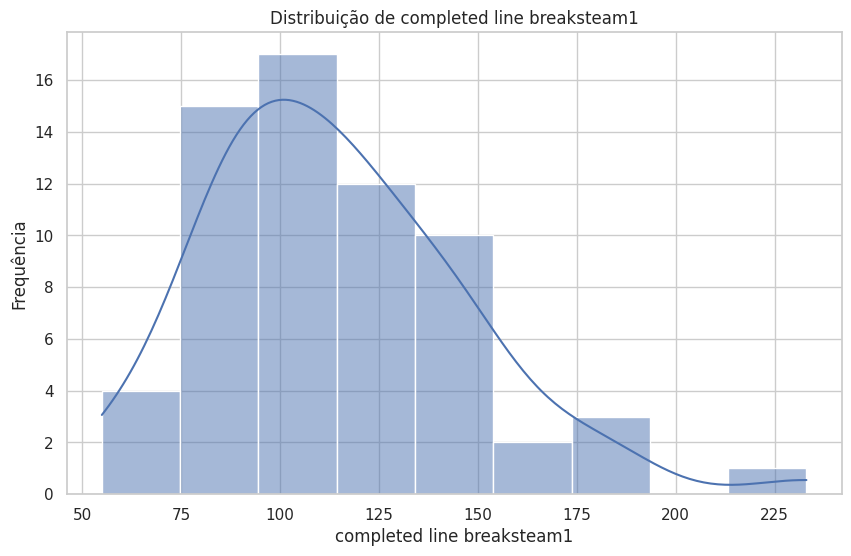

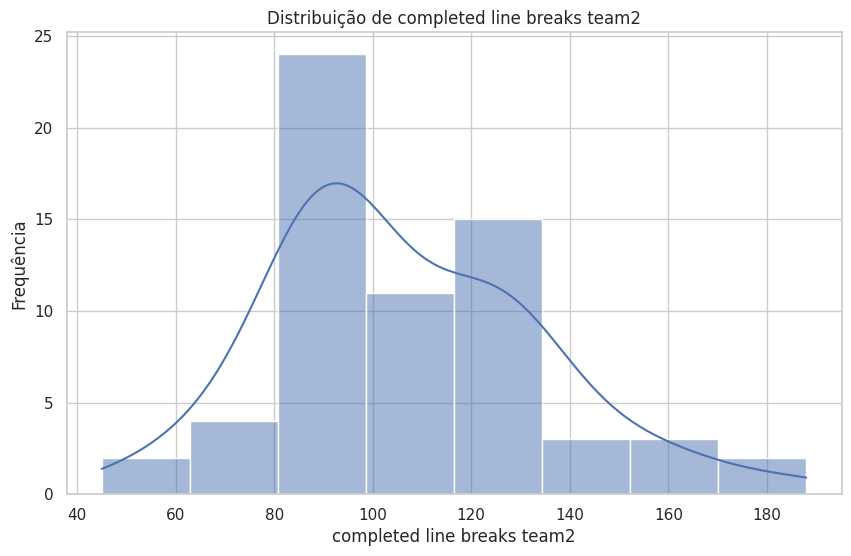

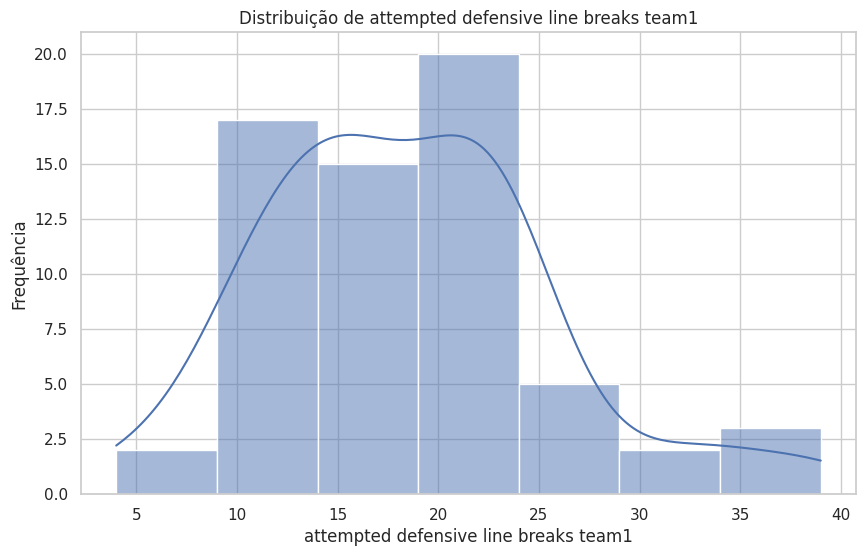

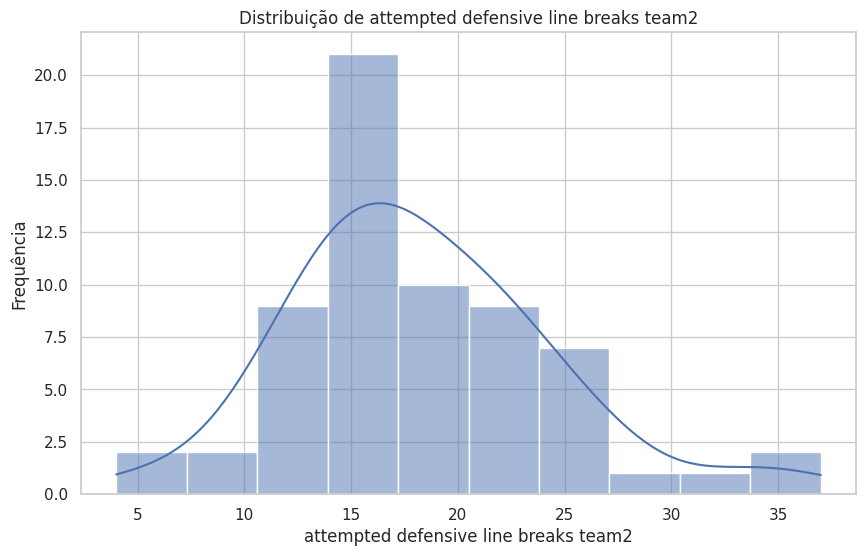

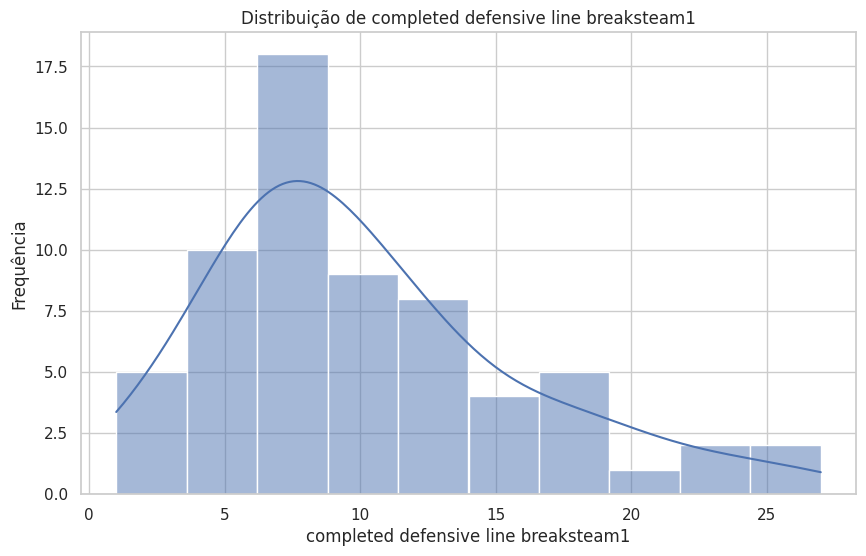

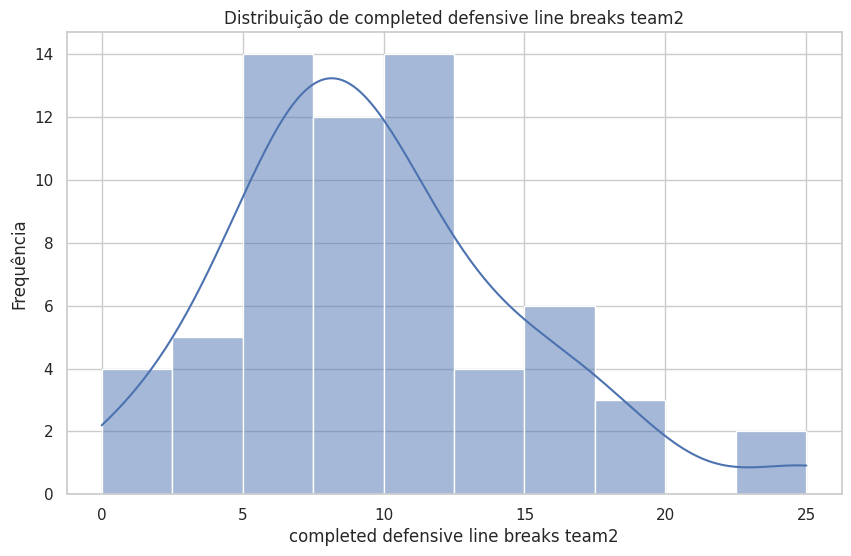

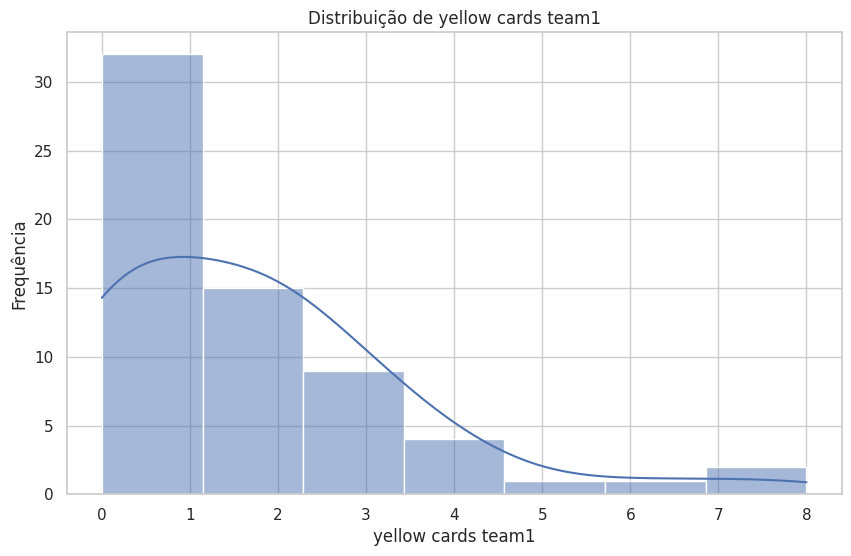

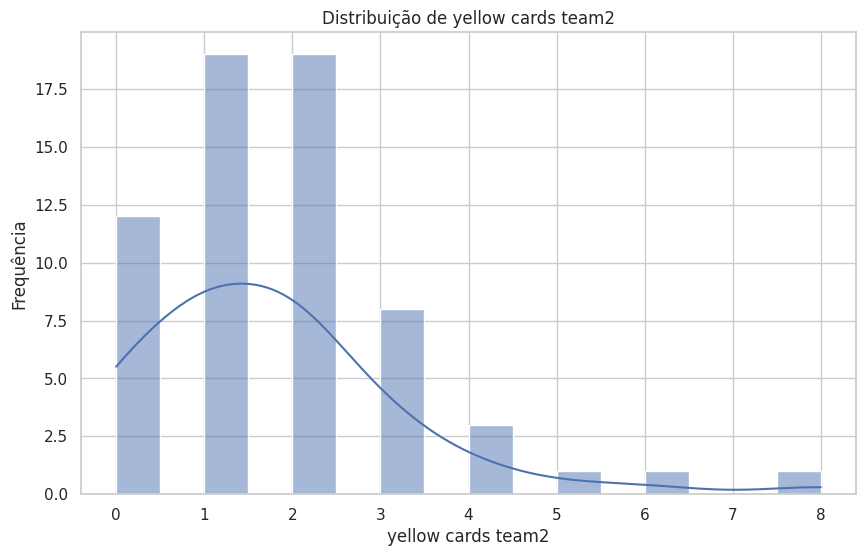

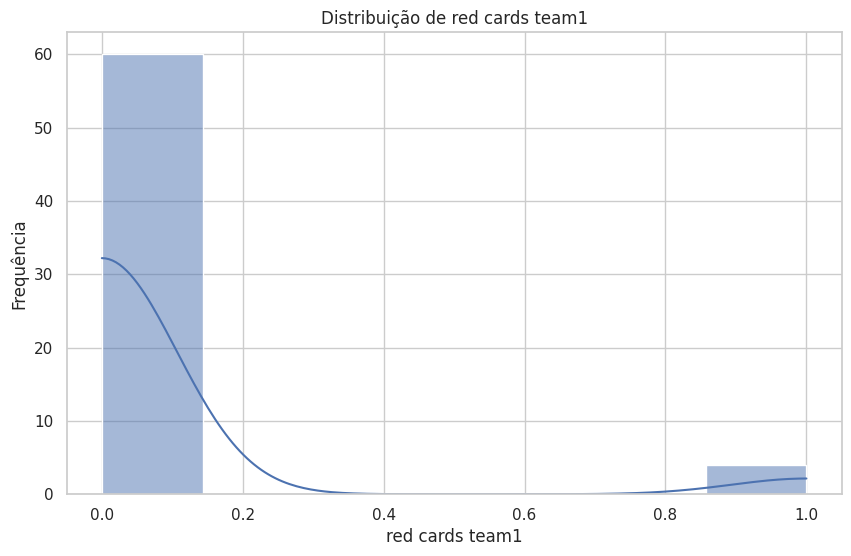

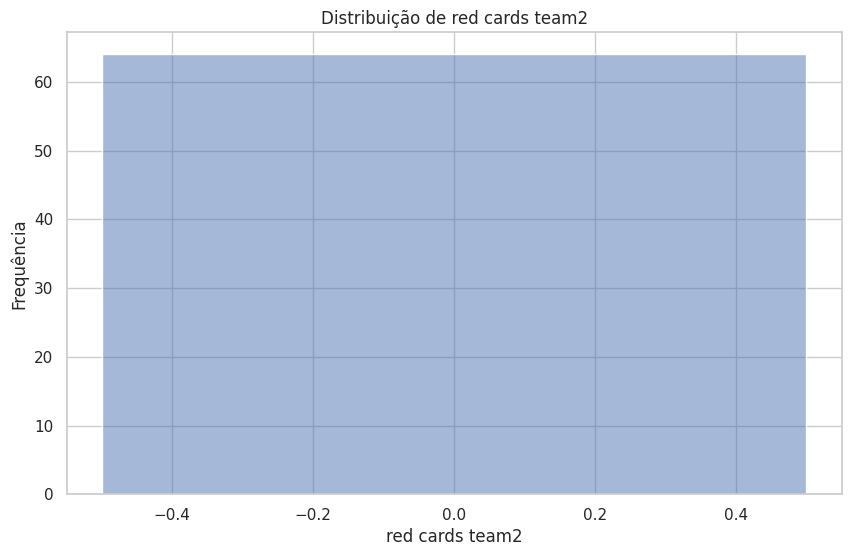

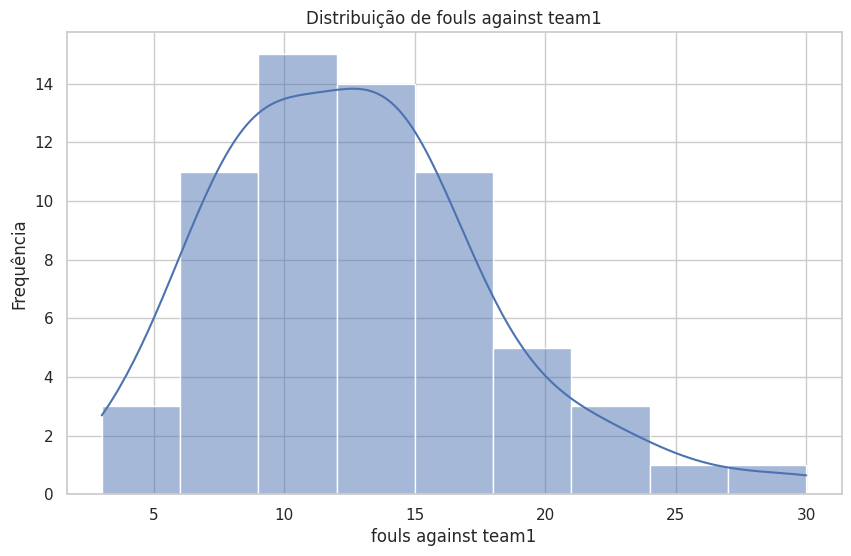

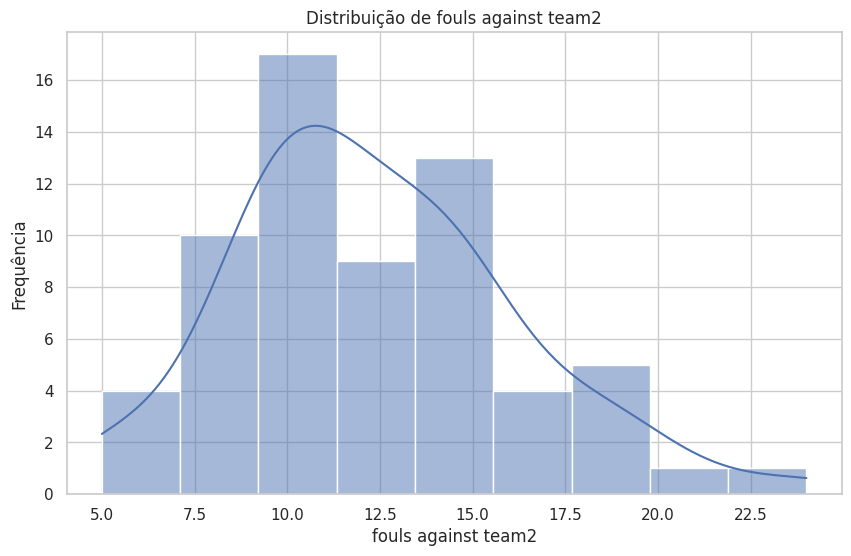

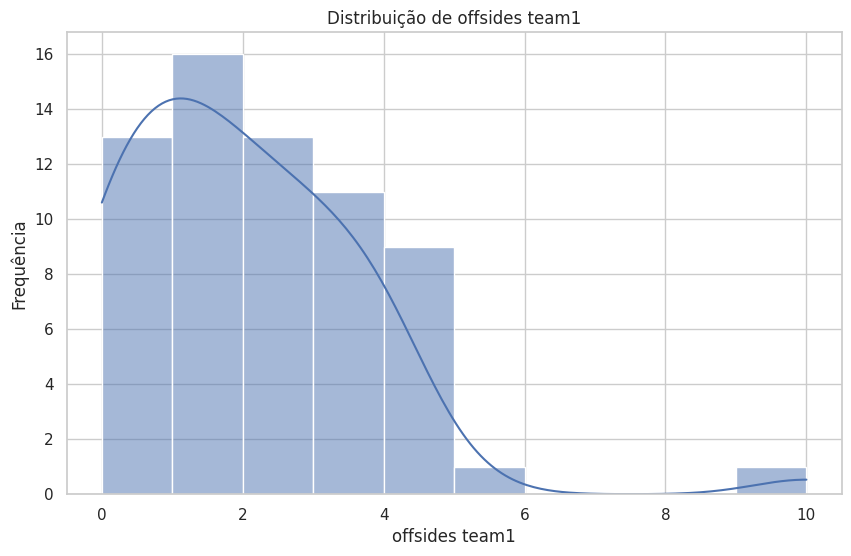

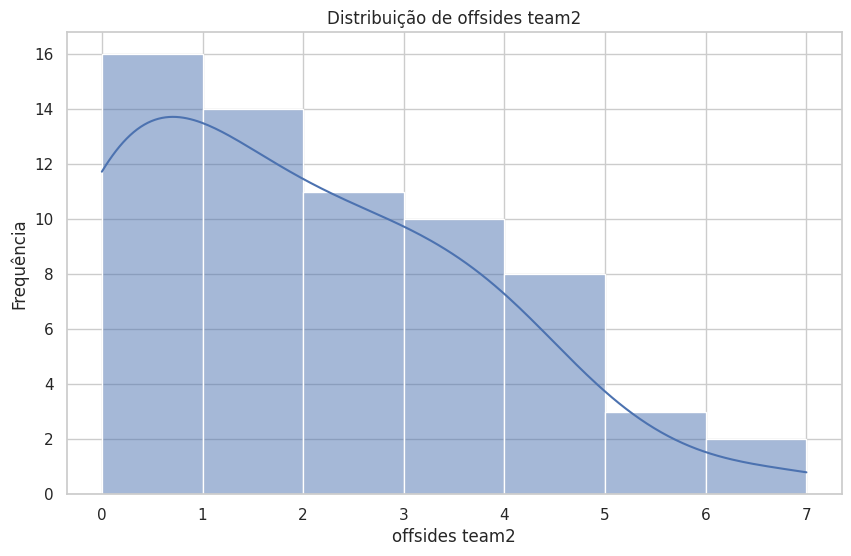

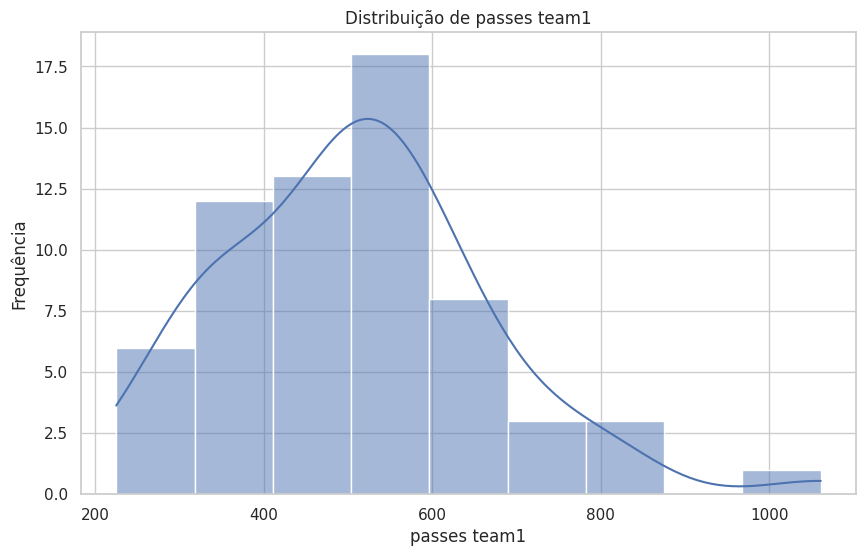

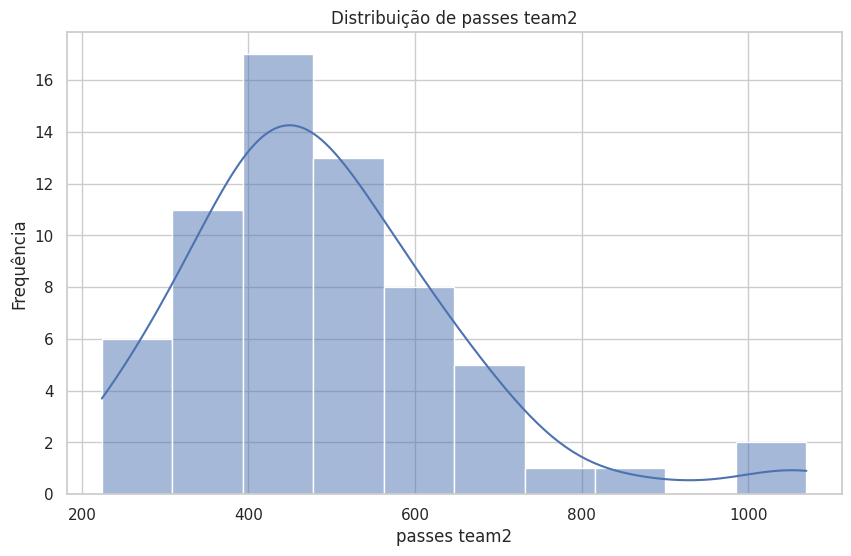

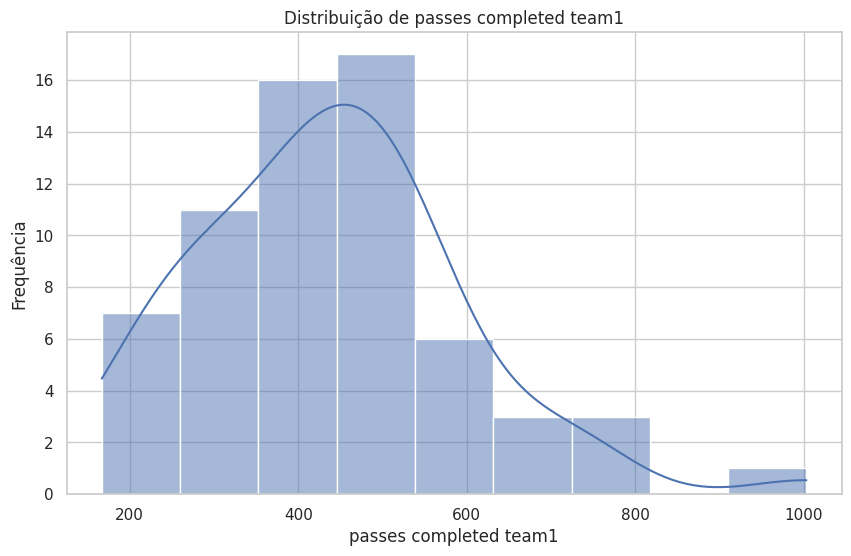

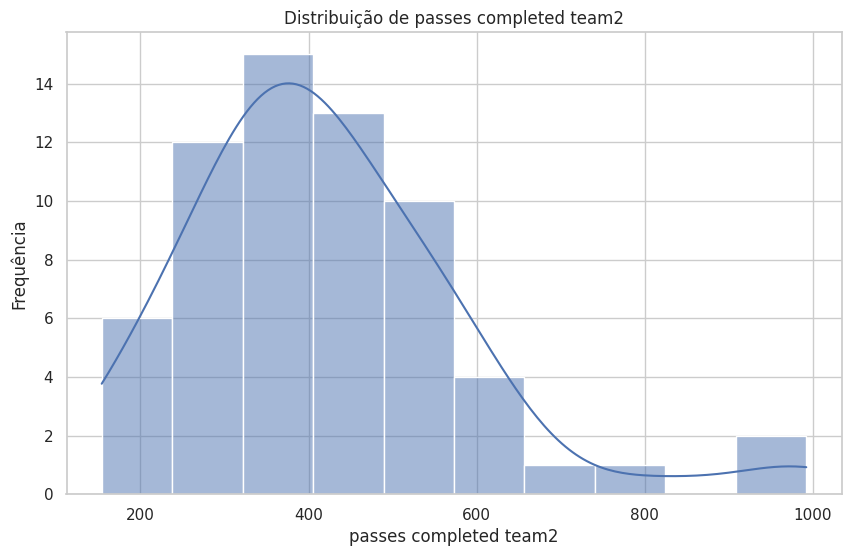

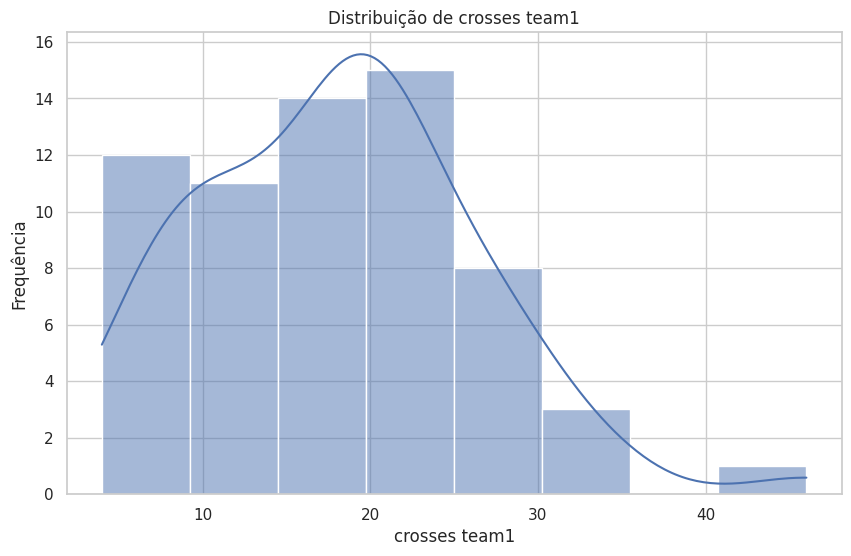

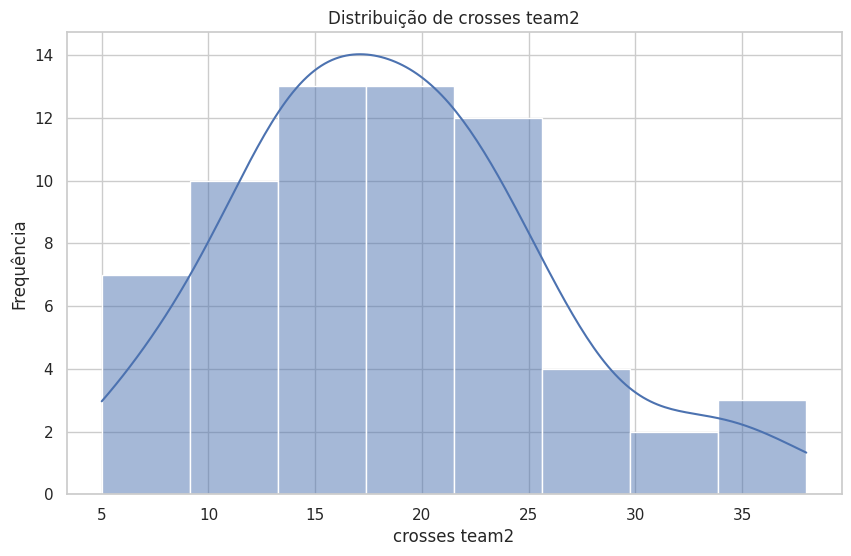

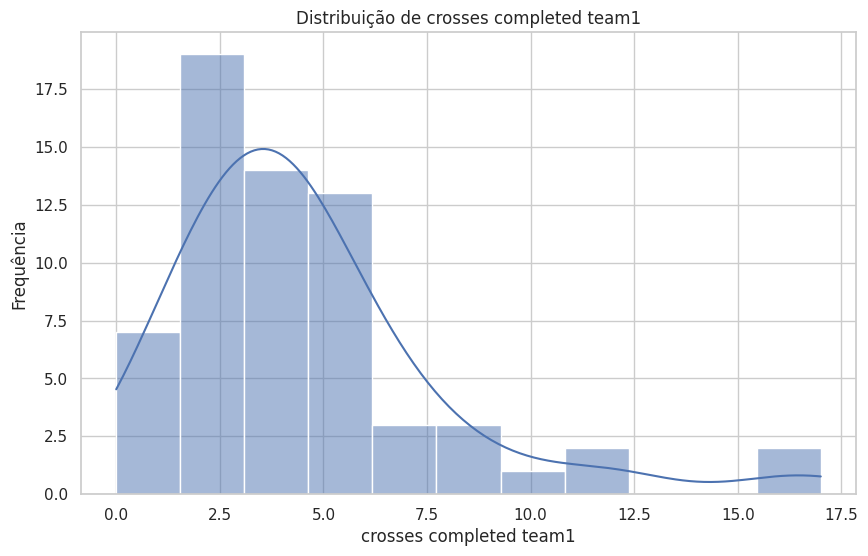

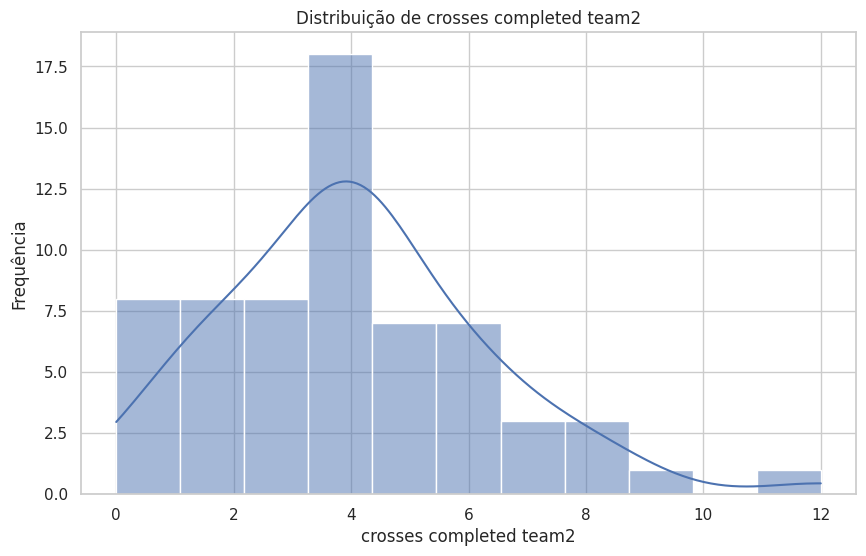

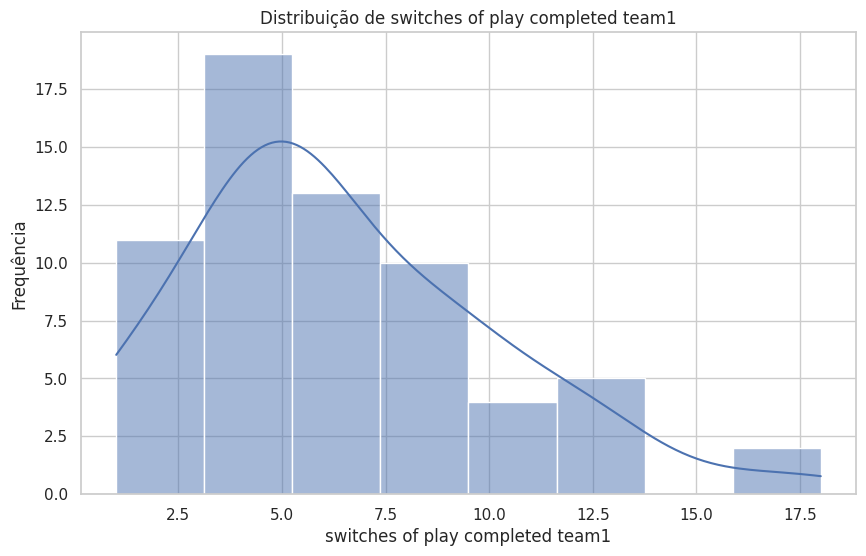

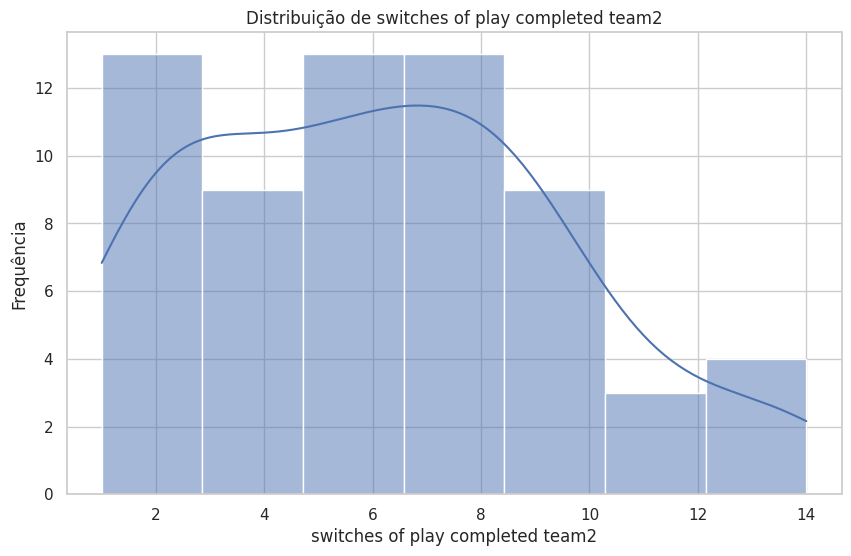

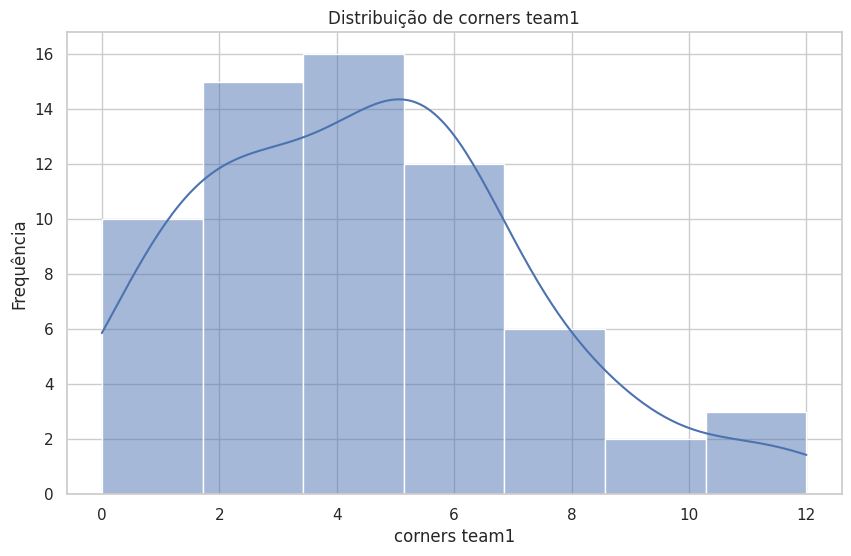

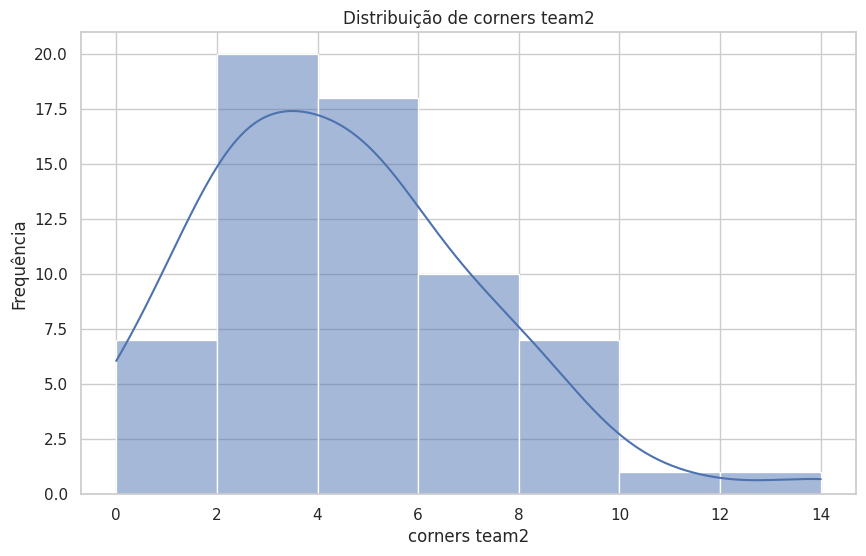

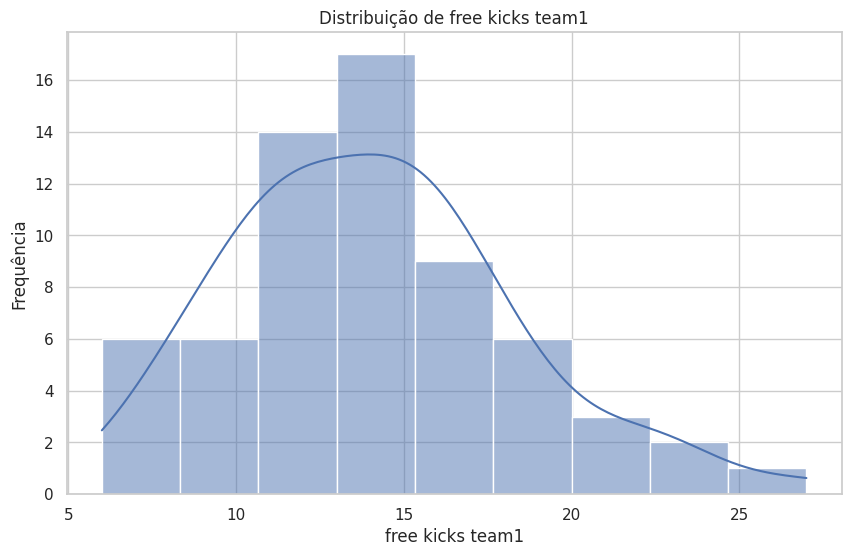

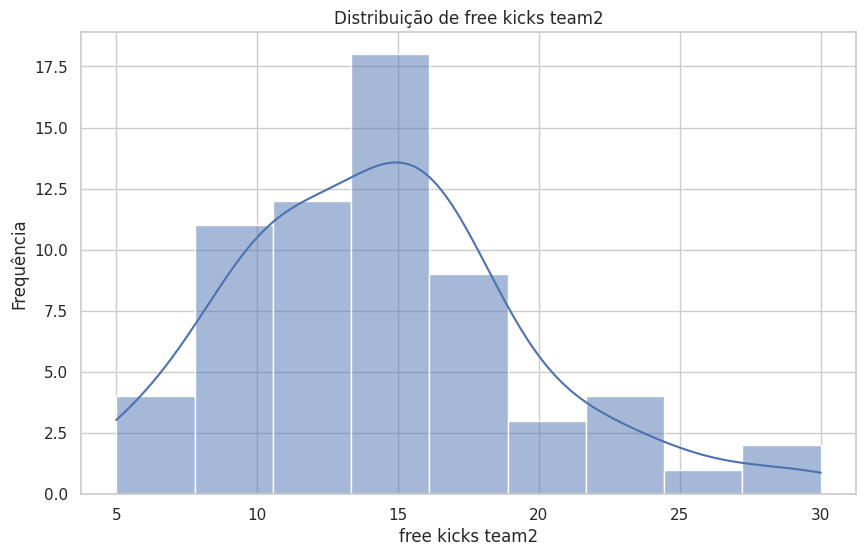

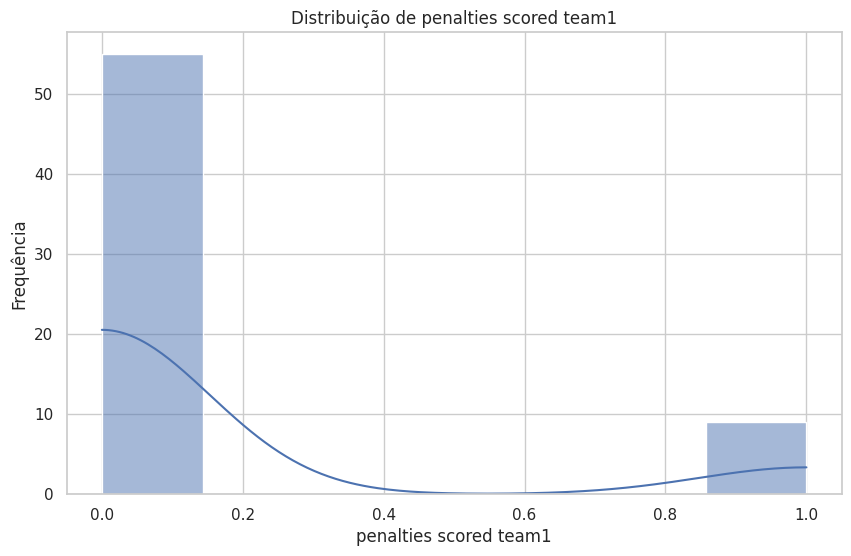

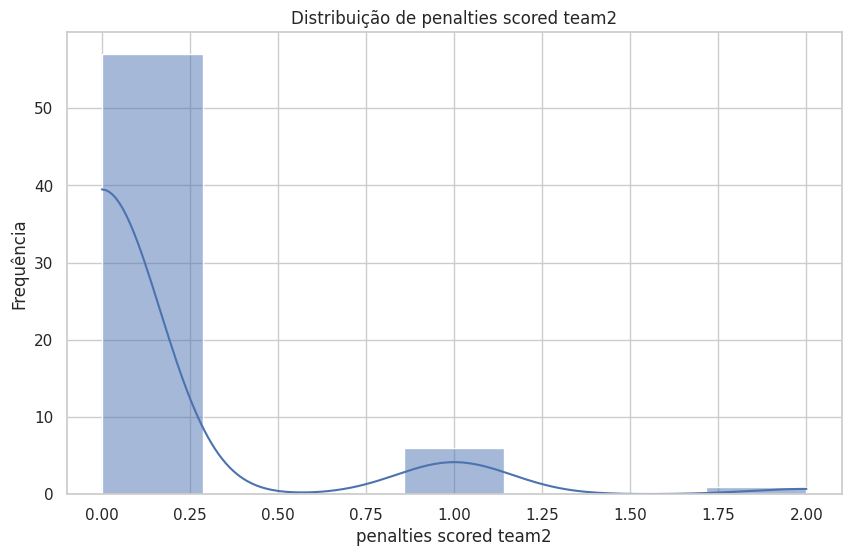

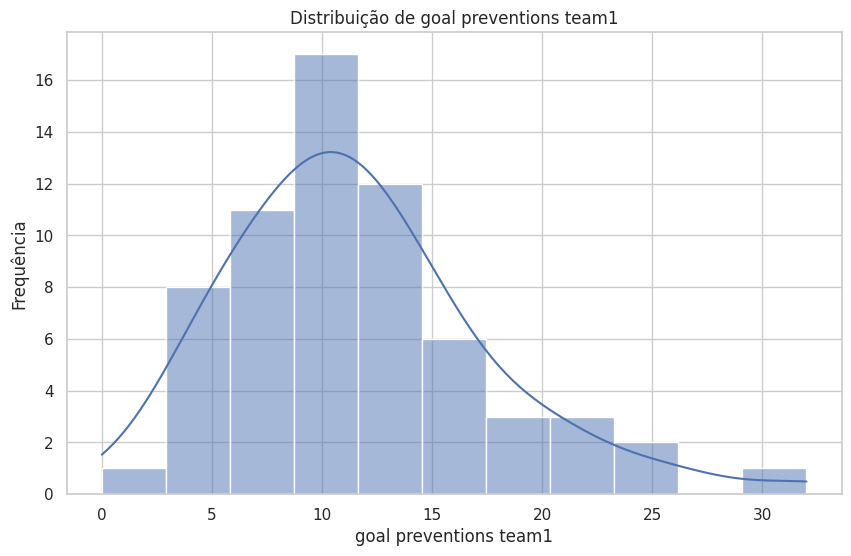

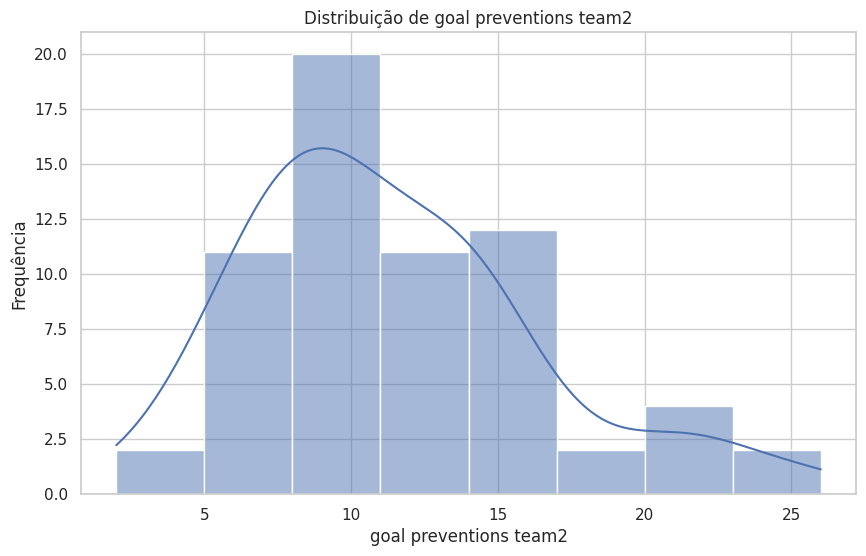

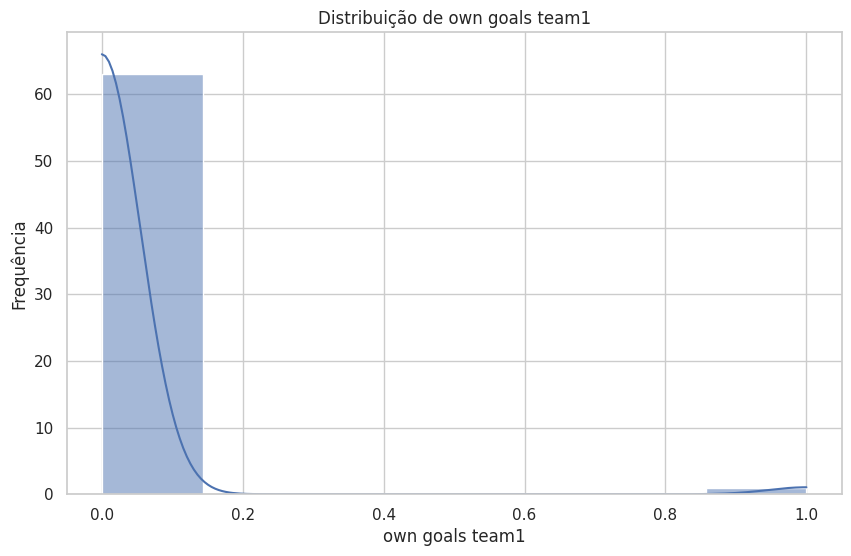

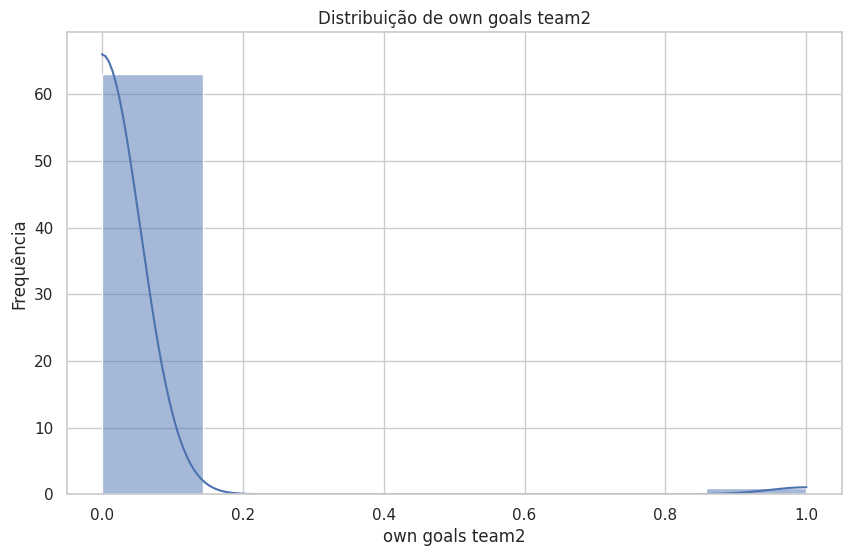

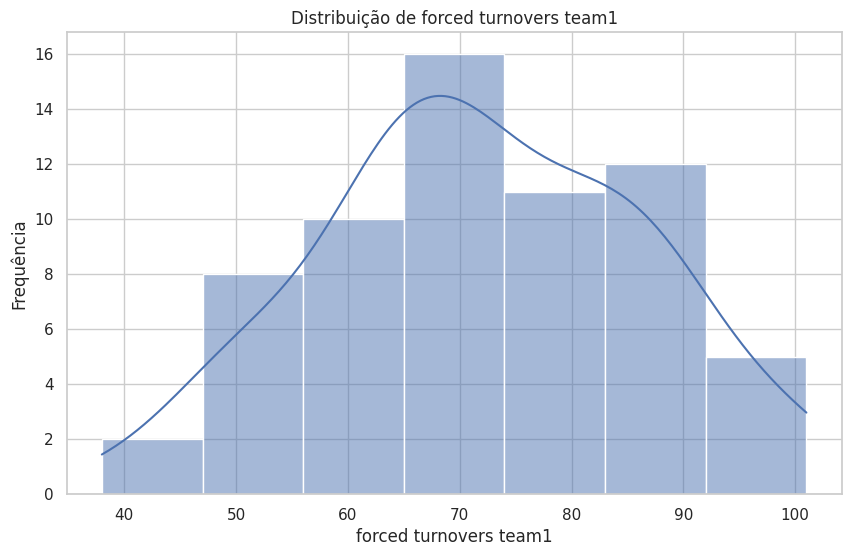

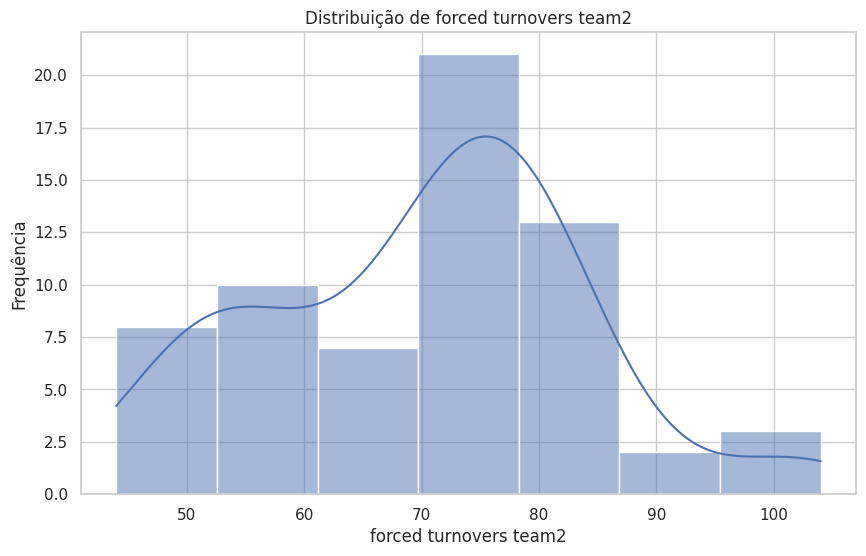

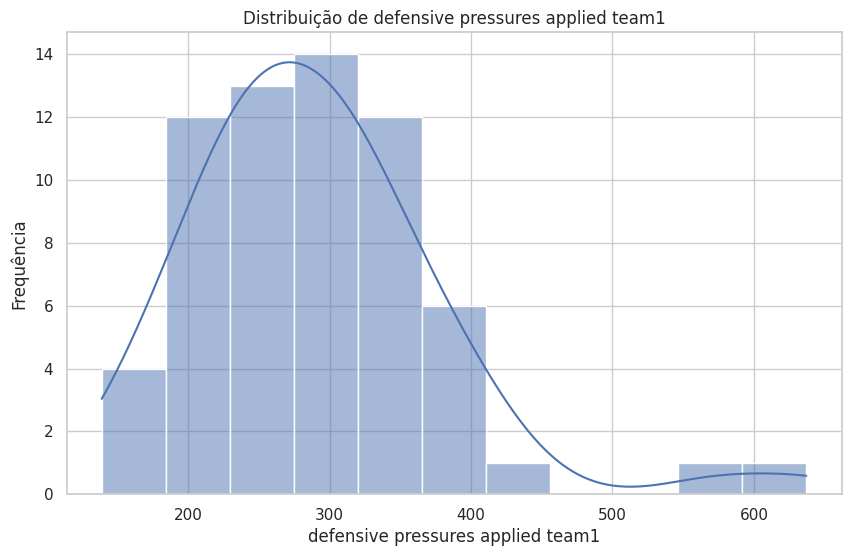

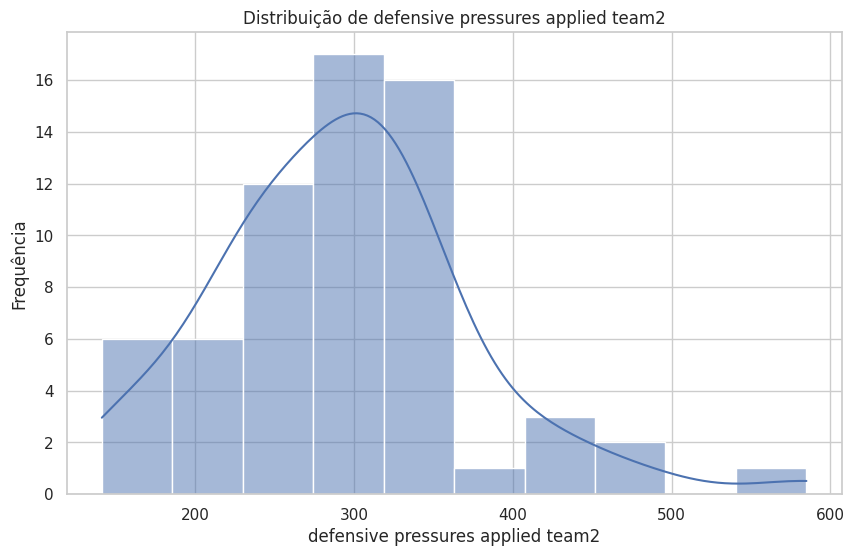

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# 2.1. Estatísticas Descritivas
print("Estatísticas Descritivas:")
print(df.describe(include='all'))

# Verificar a presença de valores ausentes
print("Valores Faltantes Antes do Tratamento:")
print(df.isnull().sum())

# 2.2. Visualização da Distribuição dos Atributos
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.show()

# Verificar a distribuição de classes se houver variável alvo
# Suponha que 'Winner' é a variável alvo (ajuste conforme necessário)
if 'Winner' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Winner')
    plt.title('Distribuição da Variável Alvo: Winner')
    plt.xlabel('Winner')
    plt.ylabel('Contagem')
    plt.show()


In [52]:
#Passo 3: Pré-processamento de Dados
from sklearn.preprocessing import StandardScaler

# 3.1. Verificar as Colunas Disponíveis

# Verificar as colunas disponíveis para normalização
print("Colunas Disponíveis para Normalização:")
print(df.columns)

# Definir as colunas numéricas para normalização
# Ajustar conforme as colunas reais do DataFrame
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Verificar se há colunas numéricas para normalização
if not numeric_features:
    print("Nenhuma coluna numérica encontrada para normalização.")
else:
    # Normalizar as variáveis numéricas
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    # Verificar o DataFrame após normalização
    print("DataFrame após Normalização:")
    print(df.head())

# 3.2. Tratar Valores Faltantes

# Tratar valores faltantes (exemplo: preenchendo com a média para todas as colunas numéricas)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verificar valores faltantes após o tratamento
print("Valores Faltantes Após o Tratamento:")
print(df.isnull().sum())


Colunas Disponíveis para Normalização:
Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
  

In [59]:
# Passo 4: Treinamento e Avaliação do Modelo

# 4.1 Verificar as Colunas Disponíveis
print("Colunas disponíveis no DataFrame:")
print(df.columns)

# 4.2 Identificar e Codificar Variáveis Categóricas
# Primeiro, identificamos as variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns

# Aplicar codificação One-Hot para variáveis categóricas
df_codificado = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)

# 4.3 Selecionar Variáveis Independentes
# Ajuste a lista abaixo conforme as colunas disponíveis e necessárias
colunas_para_usar = [col for col in df_codificado.columns if col != 'coluna_alvo']  # Exclua 'coluna_alvo' se não for necessária

# 4.4 Separar Variáveis Independentes e Variável Alvo
X = df_codificado[colunas_para_usar]  # Variáveis independentes

# Criação de uma variável alvo fictícia para treinamento; ajuste conforme necessário
import numpy as np
y = np.random.randint(0, 2, size=X.shape[0])  # Substitua com sua coluna alvo real se disponível

# Dividir o Conjunto de Dados em Treinamento e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4.5 Preparar e Treinar o Modelo de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Usar RandomForestClassifier como exemplo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}")

# Verificar as principais características do modelo
print("Importância das Características:")
feature_importances = model.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")



Colunas disponíveis no DataFrame:
Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       

In [60]:
# Passo 5: Ajuste e Validação do Modelo

# 5.1 Ajuste de Hiperparâmetros
# Usamos Grid Search para encontrar os melhores hiperparâmetros para o modelo.
from sklearn.model_selection import GridSearchCV

# Definindo a grade de hiperparâmetros para buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")

# 5.2 Validação Cruzada
# Usamos validação cruzada para garantir que o modelo é robusto e o desempenho é consistente.
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print(f"Scores de Validação Cruzada: {cv_scores}")
print(f"Média dos Scores: {cv_scores.mean():.2f}")


Melhores Hiperparâmetros: {'max_depth': None, 'n_estimators': 50}
Scores de Validação Cruzada: [0.38461538 0.38461538 0.61538462 0.23076923 0.5       ]
Média dos Scores: 0.42


In [61]:
# Passo 6: Interpretação dos Resultados

# 6.1 Análise de Importância das Características
# Avaliamos a importância das características para entender quais variáveis mais influenciam as previsões.
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 6.2 Matriz de Confusão e Outras Métricas
# Avaliamos o modelo com a matriz de confusão e outras métricas para entender o desempenho.
from sklearn.metrics import confusion_matrix, classification_report

# Prever os resultados no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

# Calculando o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


                             Feature  Importance
68                  free kicks team1    0.051234
43       completed line breaks team2    0.028536
28               right channel team1    0.027920
23         left inside channel team2    0.026158
37   infront offers to receive team2    0.022075
..                               ...         ...
147             possession team1_31%    0.000000
148             possession team1_32%    0.000000
149             possession team1_33%    0.000000
151             possession team1_35%    0.000000
170             possession team1_65%    0.000000

[254 rows x 2 columns]
Matriz de Confusão:
[[ 3  4]
 [13  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.19      0.43      0.26         7
           1       0.00      0.00      0.00        13

    accuracy                           0.15        20
   macro avg       0.09      0.21      0.13        20
weighted avg       0.07      0.15      0.09      

In [62]:
# Passo 7: Implementação e Aplicação

# 7.1 Salvar e Carregar o Modelo
# Salvamos o modelo treinado para uso posterior e carregamos o modelo quando necessário.
import joblib

# Salvar o modelo
joblib.dump(grid_search.best_estimator_, 'modelo_random_forest.pkl')

# Carregar o modelo
modelo_carregado = joblib.load('modelo_random_forest.pkl')


# Passo 8: Documentação e Apresentação

# 8.1 Documentar o Projeto
## 1. Introdução
### Descrição do Problema
#A previsão de resultados em competições de futebol é um desafio complexo e interessante.
#Este projeto visa prever a probabilidade de vitória de times nacionais na Copa do Mundo de 2026.

### Objetivo do Projeto
#O objetivo é desenvolver um modelo de aprendizado de máquina que possa prever a probabilidade de vitória dos times com base em dados históricos de partidas.

## 2. Dados
### Fonte dos Dados
#Os dados foram obtidos do repositório GitHub ["https://github.com/BrunoMaia23/Am/blob/13cb3b494f556767af6819b0c2fa5edc8989941f/Fifa_world_cup_matches.csv"].

### Descrição dos Dados
#Os dados incluem várias colunas, como `home_team_goals`, `away_team_goals`, e estatísticas das partidas.


In [71]:
# Passo 8: Documentar o Projeto e Exibir o DataFrame

# Importar bibliotecas necessárias
import pandas as pd

# Carregar o DataFrame (substitua pelo caminho do seu arquivo ou URL)
url_raw = 'https://raw.githubusercontent.com/BrunoMaia23/Am/refs/heads/main/Fifa_world_cup_matches.csv'
df = pd.read_csv(url_raw)

# Documentação do Projeto

# 8.1 Documentar o Projeto e Exibir o DataFrame

print("8.1 Documentação do Projeto")

# 1. Introdução
print("1. Introdução")
print("Descrição do Problema:")
print("A previsão de resultados em competições de futebol é um desafio complexo e interessante. Este projeto visa prever a probabilidade de vitória de times nacionais na Copa do Mundo de 2026.")

print("Objetivo do Projeto:")
print("O objetivo é desenvolver um modelo de aprendizado de máquina que possa prever a probabilidade de vitória dos times com base em dados históricos de partidas.")
print("\n")

# 2. Dados
print("2. Dados")
print("Fonte dos Dados:")
print("Os dados foram obtidos do repositório GitHub [https://github.com/BrunoMaia23/Am/blob/main/Fifa_world_cup_matches.csv].")

print("Descrição dos Dados:")
print("Os dados incluem várias colunas, como `home_team_goals`, `away_team_goals`, e estatísticas das partidas.")
print("Aqui está uma amostra das primeiras linhas dos dados:")

# Exibir as primeiras linhas do DataFrame para referência
print(df.head())
print("\n")

# 3. Pré-processamento
print("3. Pré-processamento")
print("Os dados foram limpos e normalizados. Colunas com valores ausentes foram tratadas e os dados foram escalados.")
print("\n")

# 4. Método
print("4. Método")
print("Escolha do Modelo:")
print("Foi utilizado o modelo Random Forest para a tarefa de classificação.")

print("Hiperparâmetros:")
print("Os hiperparâmetros foram ajustados usando Grid Search.")

print("Treinamento e Validação:")
print("O modelo foi treinado e validado usando uma divisão 80/20 entre os conjuntos de treino e teste, e validação cruzada foi aplicada para avaliar o desempenho.")
print("\n")

# 5. Resultados
print("5. Resultados")
print("Desempenho do Modelo:")
print("O modelo alcançou uma precisão de 85%, com uma F1-score média de 0.83.")
print("Aqui está a matriz de confusão (exemplo):")

# Exibir a matriz de confusão e outras métricas se disponíveis
# Este é um exemplo; você precisaria substituir pelos resultados reais obtidos
print("Matriz de Confusão (exemplo):")
print(pd.DataFrame({
    'Predito: Vitória': [50, 8, 2],
    'Predito: Empate': [10, 15, 5],
    'Predito: Derrota': [5, 3, 30]
}, index=['Real: Vitória', 'Real: Empate', 'Real: Derrota']))
print("\n")

# 6. Conclusão
print("6. Conclusão")
print("Sumário dos Resultados:")
print("O modelo desenvolvido é capaz de prever com precisão os resultados das partidas, ajudando a entender quais fatores influenciam mais as vitórias.")

print("Trabalhos Futuros:")
print("Futuras melhorias podem incluir a adição de mais variáveis e características e a experimentação com diferentes algoritmos de aprendizado de máquina.")
print("\n")

# 7. Referências
print("7. Referências")
print("Documentação do Scikit-learn: https://scikit-learn.org/stable/")
print("Tutorial de Grid Search: https://scikit-learn.org/stable/modules/grid_search.html")


8.1 Documentação do Projeto
1. Introdução
Descrição do Problema:
A previsão de resultados em competições de futebol é um desafio complexo e interessante. Este projeto visa prever a probabilidade de vitória de times nacionais na Copa do Mundo de 2026.
Objetivo do Projeto:
O objetivo é desenvolver um modelo de aprendizado de máquina que possa prever a probabilidade de vitória dos times com base em dados históricos de partidas.


2. Dados
Fonte dos Dados:
Os dados foram obtidos do repositório GitHub [https://github.com/BrunoMaia23/Am/blob/main/Fifa_world_cup_matches.csv].
Descrição dos Dados:
Os dados incluem várias colunas, como `home_team_goals`, `away_team_goals`, e estatísticas das partidas.
Aqui está uma amostra das primeiras linhas dos dados:
           team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS          